**CA4 (Machine Learning)**

Training different classifiers on a dataset and test models.

# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from copy import deepcopy
from IPython.display import display, HTML

from sklearn import metrics
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from mlxtend.evaluate import bias_variance_decomp

from dataclasses import dataclass

from xgboost import XGBClassifier

In [2]:
TARGET_COLUMN = 'NumPurchases'

# Explorin Dataset

## Reading a CSV File into a Pandas DataFrame

In [3]:
df = pd.read_csv('marketing_campaign.csv')
# delete the first column as it is just a normal counting number.
# df = df.drop(df.columns[0], axis=1)

In [4]:
pd.set_option("display.max_columns", None)
df.head(10)

Unnamed: 0    ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0           0  5524        1957  Graduation         Single  58138.0        0   
1           1  2174        1954  Graduation         Single  46344.0        1   
2           2  4141        1965  Graduation       Together  71613.0        0   
3           3  6182        1984  Graduation       Together  26646.0        1   
4           4  5324        1981         PhD        Married  58293.0        1   
5           5  7446        1967      Master       Together      NaN        0   
6           6   965        1971  Graduation       Divorced  55635.0        0   
7           7  6177        1985         PhD        Married  33454.0        1   
8           8  4855        1974         PhD       Together  30351.0        1   
9           9  5899        1950         PhD       Together   5648.0        1   

   Teenhome Dt_Customer  Recency  MntCoffee  MntFruits  MntMeatProducts  \
0         0  04-09-2012       58      635.0         88              546   
1         1  08-03-2014       38        NaN          1                6   
2         0  21-08-2013       26        NaN         49              127   
3         0  10-02-2014       26       11.0          4               20   
4         0  19-01-2014       94      173.0         43              118   
5         1  09-09-2013       16      520.0         42               98   
6         1  13-11-2012       34      235.0         65              164   
7         0  08-05-2013       32       76.0         10               56   
8         0  06-06-2013       19       14.0          0               24   
9         1  13-03-2014       68       28.0          0                6   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumWebVisitsMonth  \
0              172                88          88.0                NaN   
1                2                 1           6.0                5.0   
2              111                21          42.0                NaN   
3               10                 3           5.0                6.0   
4               46                27          15.0                5.0   
5                0                42          14.0                NaN   
6               50                49          27.0                6.0   
7                3                 1          23.0                8.0   
8                3                 3           2.0                9.0   
9                1                 1          13.0               20.0   

   Complain  NumPurchases  UsedCampaignOffer  
0         0            25                  1  
1         0             6                  0  
2         0            21                  0  
3         0             8                  0  
4         0            19                  0  
5         0            22                  0  
6         0            21                  0  
7         0            10                  0  
8         0             6                  1  
9         0             2                  1

## 1. DataFrame Information

> The `info` method shows general info about our data frame, for example, its data and data types. As we can see we have 2240 entries in our data frame.

> It includes 19 columns including its name, Non-Null count, and Dtype(data type).

- Non-Null Count:
> Means how many rows have a value in a specific column.

At last, there is a printed count of each datatype, and data frames memory usage.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2240 non-null   int64  
 1   ID                 2240 non-null   int64  
 2   Year_Birth         2240 non-null   int64  
 3   Education          2240 non-null   object 
 4   Marital_Status     2240 non-null   object 
 5   Income             2017 non-null   float64
 6   Kidhome            2240 non-null   int64  
 7   Teenhome           2240 non-null   int64  
 8   Dt_Customer        2240 non-null   object 
 9   Recency            2240 non-null   int64  
 10  MntCoffee          2035 non-null   float64
 11  MntFruits          2240 non-null   int64  
 12  MntMeatProducts    2240 non-null   int64  
 13  MntFishProducts    2240 non-null   int64  
 14  MntSweetProducts   2240 non-null   int64  
 15  MntGoldProds       2227 non-null   float64
 16  NumWebVisitsMonth  2040 

The `describe` method shows some statistical information about our dataframe.

> Each table row reports a property of the corresponding column's data:  

- count: The number of the data.
- mean: The average of the data.
- std: The standard deviation of the data.
- min: The minimum data.
- 25%: The first quartile of the column's data.
- 50%: The median of the column's data.
- 75%: The third quartile of the column's data.
- max: The maximum data.

In [6]:
df.describe()

Unnamed: 0            ID   Year_Birth         Income      Kidhome  \
count  2240.000000   2240.000000  2240.000000    2017.000000  2240.000000   
mean   1119.500000   5592.159821  1968.805804   52297.080317     0.437946   
std     646.776623   3246.662198    11.984069   25543.108215     0.563666   
min       0.000000      0.000000  1893.000000    2447.000000    -5.000000   
25%     559.750000   2828.250000  1959.000000   35340.000000     0.000000   
50%    1119.500000   5458.500000  1970.000000   51369.000000     0.000000   
75%    1679.250000   8427.750000  1977.000000   68316.000000     1.000000   
max    2239.000000  11191.000000  1996.000000  666666.000000     2.000000   

          Teenhome      Recency    MntCoffee    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2035.000000  2240.000000      2240.000000   
mean      0.506250    49.109375   304.239312    26.302232       166.950000   
std       0.544538    28.962453   337.515534    39.773434       225.715373   
min       0.000000     0.000000     0.000000     0.000000         0.000000   
25%       0.000000    24.000000    23.000000     1.000000        16.000000   
50%       0.000000    49.000000   177.000000     8.000000        67.000000   
75%       1.000000    74.000000   505.000000    33.000000       232.000000   
max       2.000000    99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumWebVisitsMonth  \
count      2240.000000       2240.000000   2227.000000        2040.000000   
mean         37.525446         27.062946     43.847777           5.326961   
std          54.628979         41.280498     51.897098           2.439349   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           3.000000   
50%          12.000000          8.000000     24.000000           6.000000   
75%          50.000000         33.000000     56.000000           7.000000   
max         259.000000        263.000000    362.000000          20.000000   

          Complain  NumPurchases  UsedCampaignOffer  
count  2240.000000   2240.000000        2240.000000  
mean      0.009375     14.862054           0.271875  
std       0.096391      7.677173           0.445025  
min       0.000000      0.000000           0.000000  
25%       0.000000      8.000000           0.000000  
50%       0.000000     15.000000           0.000000  
75%       0.000000     21.000000           1.000000  
max       1.000000     44.000000           1.000000

## 2. Count and Percentage of Missing Data for Each Feature

In [7]:
def missing_values(df: pd.DataFrame) -> pd.DataFrame:
    nan_vals_count = df.isna().sum()
    nan_vals_percent = nan_vals_count / len(df)
    nan_values = pd.concat([nan_vals_count, nan_vals_percent], axis=1, keys=["Missing", "Percentage"])
    return nan_values
missing_values(df)

Missing  Percentage
Unnamed: 0               0    0.000000
ID                       0    0.000000
Year_Birth               0    0.000000
Education                0    0.000000
Marital_Status           0    0.000000
Income                 223    0.099554
Kidhome                  0    0.000000
Teenhome                 0    0.000000
Dt_Customer              0    0.000000
Recency                  0    0.000000
MntCoffee              205    0.091518
MntFruits                0    0.000000
MntMeatProducts          0    0.000000
MntFishProducts          0    0.000000
MntSweetProducts         0    0.000000
MntGoldProds            13    0.005804
NumWebVisitsMonth      200    0.089286
Complain                 0    0.000000
NumPurchases             0    0.000000
UsedCampaignOffer        0    0.000000

In [8]:
missing_data = pd.DataFrame({
    'Feature': df.columns,
    'Missing Count': df.isnull().sum(),
    'Missing Percentage': df.isnull().mean() * 100
})

missing_data

Feature  Missing Count  Missing Percentage
Unnamed: 0                Unnamed: 0              0            0.000000
ID                                ID              0            0.000000
Year_Birth                Year_Birth              0            0.000000
Education                  Education              0            0.000000
Marital_Status        Marital_Status              0            0.000000
Income                        Income            223            9.955357
Kidhome                      Kidhome              0            0.000000
Teenhome                    Teenhome              0            0.000000
Dt_Customer              Dt_Customer              0            0.000000
Recency                      Recency              0            0.000000
MntCoffee                  MntCoffee            205            9.151786
MntFruits                  MntFruits              0            0.000000
MntMeatProducts      MntMeatProducts              0            0.000000
MntFishProducts      MntFishProducts              0            0.000000
MntSweetProducts    MntSweetProducts              0            0.000000
MntGoldProds            MntGoldProds             13            0.580357
NumWebVisitsMonth  NumWebVisitsMonth            200            8.928571
Complain                    Complain              0            0.000000
NumPurchases            NumPurchases              0            0.000000
UsedCampaignOffer  UsedCampaignOffer              0            0.000000

## 3. Visualizing Feature Relationships and Correlations

### Correlation Matrix with a heatmap

$\rho_{XY} = \frac{\text{cov}(X, Y)}{\sigma_X \sigma_Y}$
* ρXY​ is the correlation coefficient between variables XX and YY.
* cov(X,Y)cov(X,Y) represents the covariance between XX and YY.
* σXσX​ and σYσY​ are the standard deviations of XX and YY respectively.

$\text{cov}(X, Y) = \frac{\sum_{i=1}^{n}(X_i - \bar{X})(Y_i - \bar{Y})}{n-1}$

* cov(X,Y) is the covariance between variables XX and YY.
* XiXi​ and YiYi​ are individual data points for variables XX and YY.
* X-Xˉ and Y-Yˉ are the mean values of XX and YY respectively.
* nn is the number of data points.

$\sigma = \sqrt{\frac{\sum_{i=1}^{n}(X_i - \bar{X})^2}{n-1}}$
* σ is the standard deviation.
* XiXi​ represents individual data points.
* X-Xˉ is the mean of the data.
* nn is the number of data points.

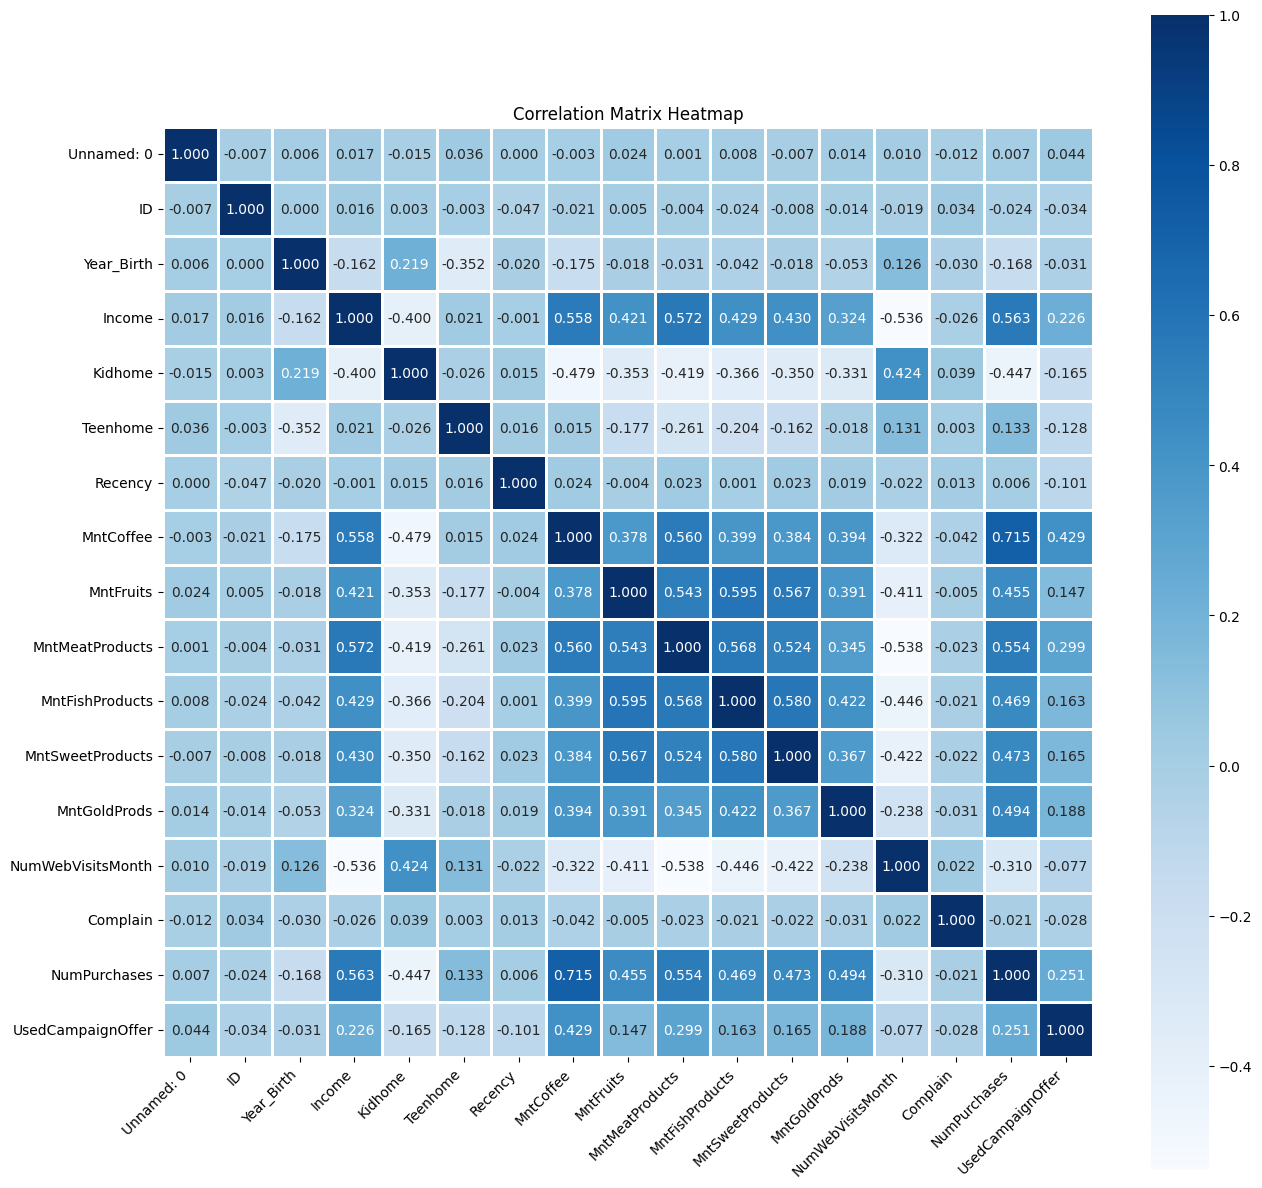

In [9]:
def plot_correlation_heatmap(df):
    numeric_df = df.select_dtypes(include=['number'])
    plt.figure(figsize=(15, 15))
    sns.heatmap(numeric_df.corr(), annot=True, fmt=".3f", cmap="Blues", linewidths=1, square=True)
    plt.title('Correlation Matrix Heatmap')
    plt.xticks(rotation=45, ha='right')
    plt.show()
plot_correlation_heatmap(df)

### Features with stronger correlation to the target column(NumPurchases)

here I consider the features with a correlation above 0.45

In [11]:
def select_features_by_correlation(df, target_column='NumPurchases', threshold_low=0.25, threshold_high=0.45):
    numeric_df = df.select_dtypes(include=['number'])
    target_corr = numeric_df.corr()[target_column].drop(target_column)
    target_corr_filtered = target_corr[abs(target_corr) > threshold_low].sort_values(ascending=False)
    selected_features = target_corr_filtered[abs(target_corr_filtered) > threshold_high].sort_values(ascending=False)
    return selected_features

selected_features = select_features_by_correlation(df, target_column='NumPurchases')
selected_features

MntCoffee           0.715164
Income              0.562603
MntMeatProducts     0.554229
MntGoldProds        0.493939
MntSweetProducts    0.472876
MntFishProducts     0.469454
MntFruits           0.455461
Name: NumPurchases, dtype: float64

## 4. Number of Observations for Each Unique with a Stronger Correlation.

In [12]:
df[selected_features.index].nunique()

MntCoffee            747
Income              1810
MntMeatProducts      558
MntGoldProds         212
MntSweetProducts     177
MntFishProducts      182
MntFruits            158
dtype: int64

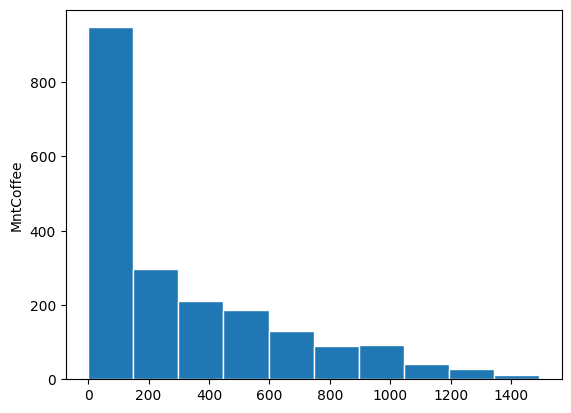

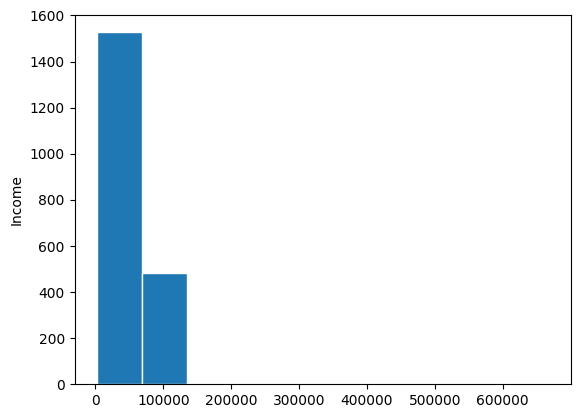

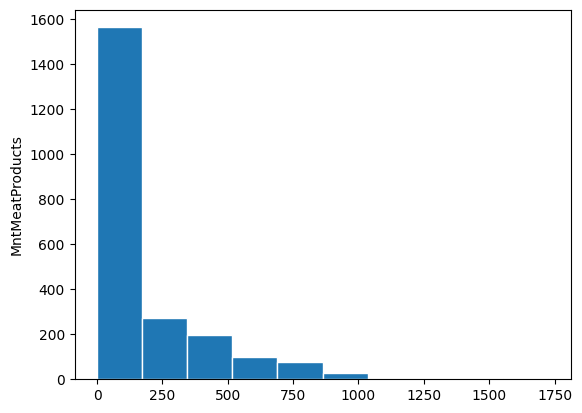

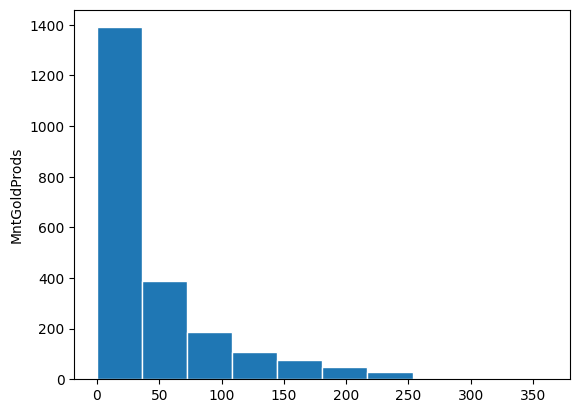

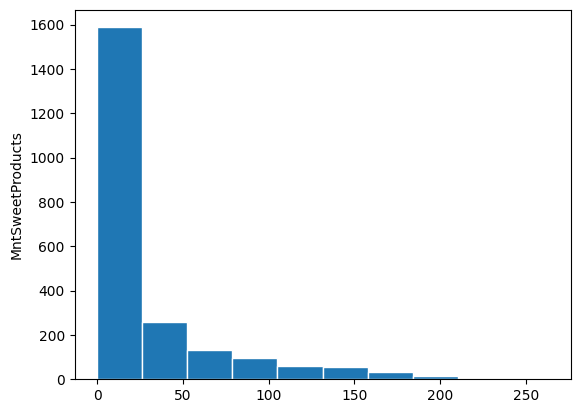

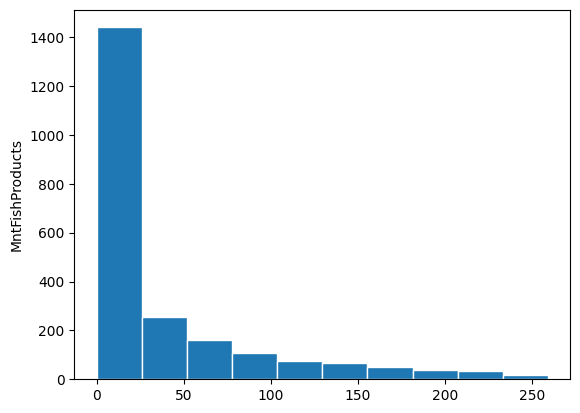

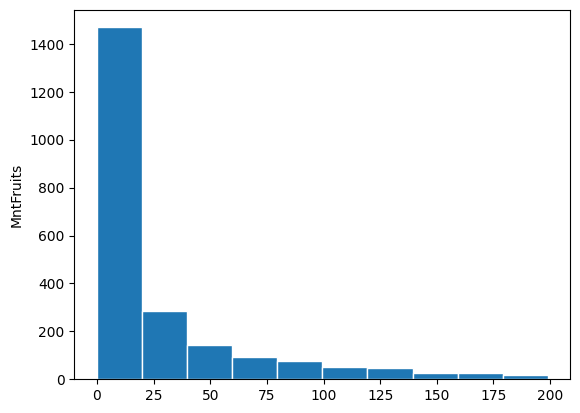

In [16]:
# visualize_feature_distribution
for feature in selected_features.index:
    plt.hist(df[feature], edgecolor='white')
    plt.ylabel(feature)
    plt.show()

## 5. Visualizing Feature Correlation using scatter and hexbin.

In [17]:
def explore_relationship(df, selected_features):
    sns.set(rc={'figure.figsize': (10, 6)})
    for feature in selected_features.index.to_list():
        scatter_plot(df, feature, TARGET_COLUMN)
        hexbin_plot(df, feature, TARGET_COLUMN)

def scatter_plot(df, feature, target_col=TARGET_COLUMN):
    sns.scatterplot(x=feature, y=target_col, data=df)
    plt.title(f'Scatter Plot: {feature} vs {target_col}')
    plt.show()

def hexbin_plot(df, feature, target_col=TARGET_COLUMN):
    sns.jointplot(x=feature, y=target_col, data=df, kind='hex', color='green')
    plt.suptitle(f'Hexbin Plot: {feature} vs {target_col}', y=1.02)
    plt.show()

Here, the scatter and hexbin diagrams are drawn for the chosen features in previous part.

With hexbin diagram, we can see the density of similar data.

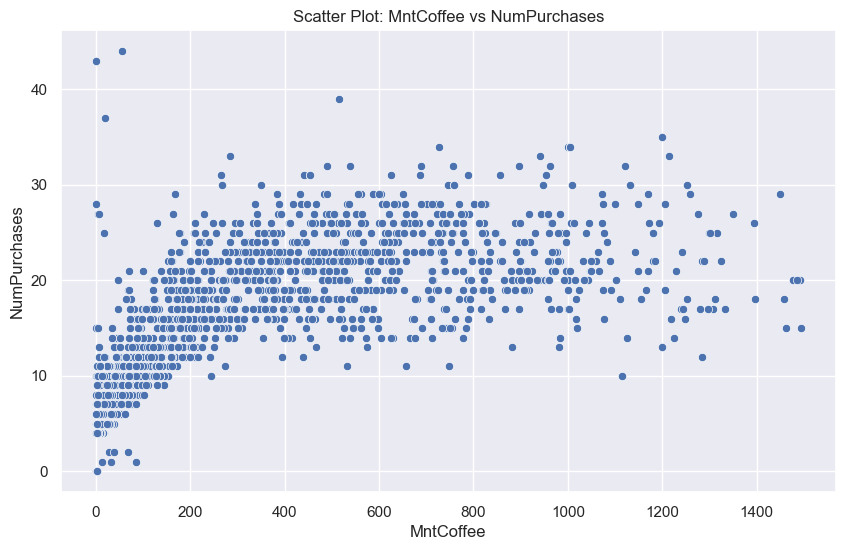

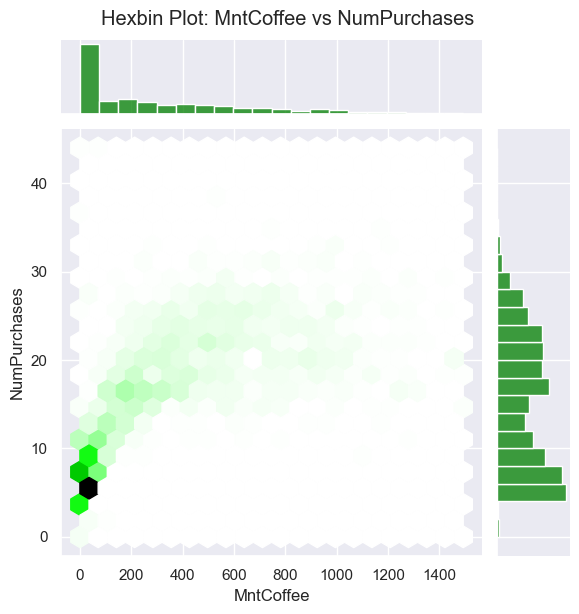

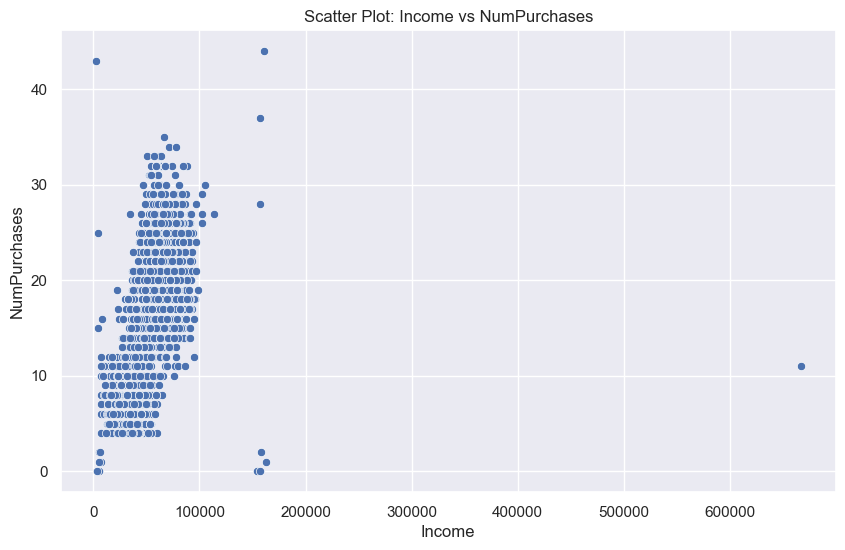

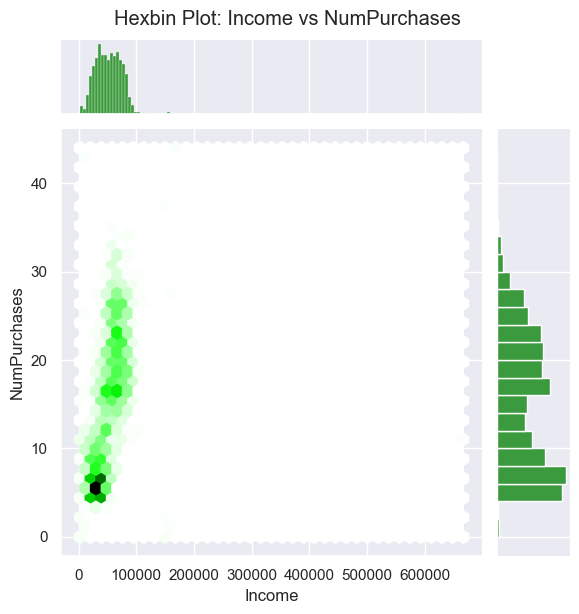

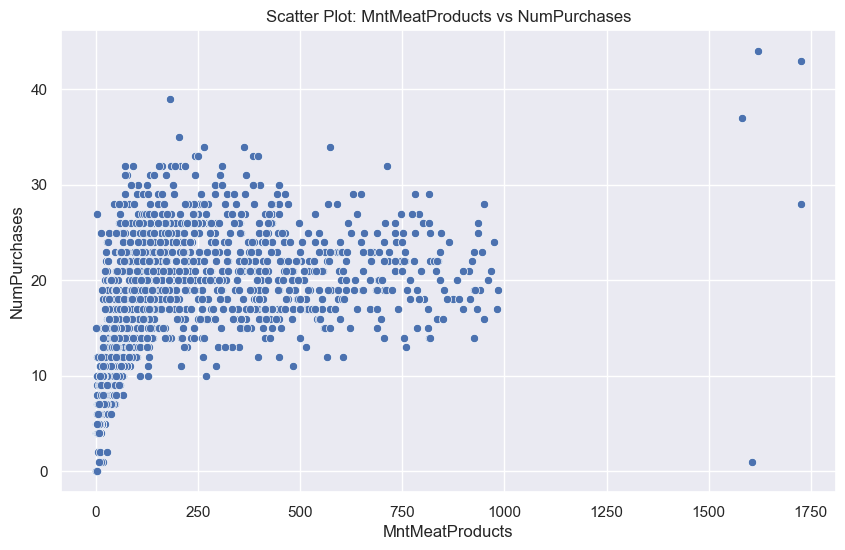

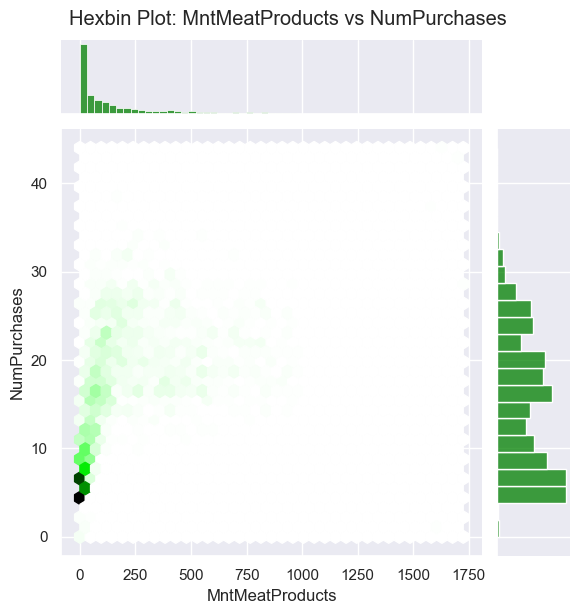

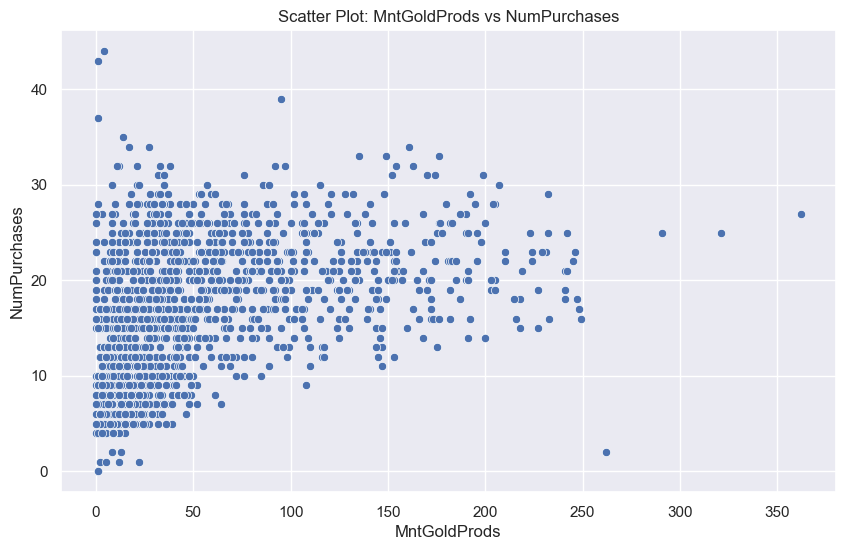

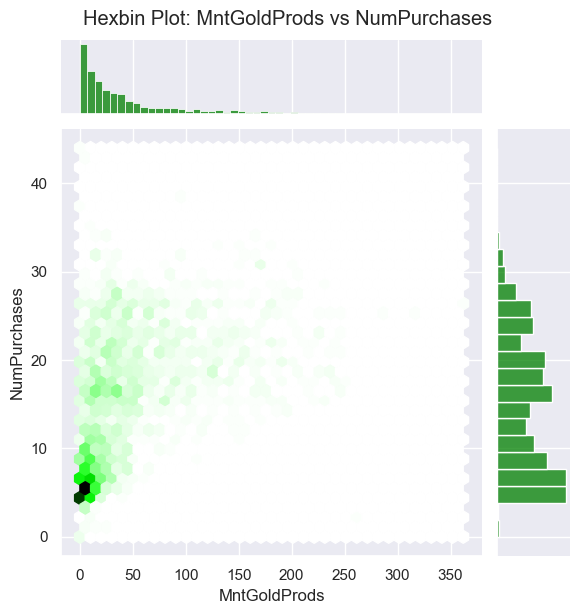

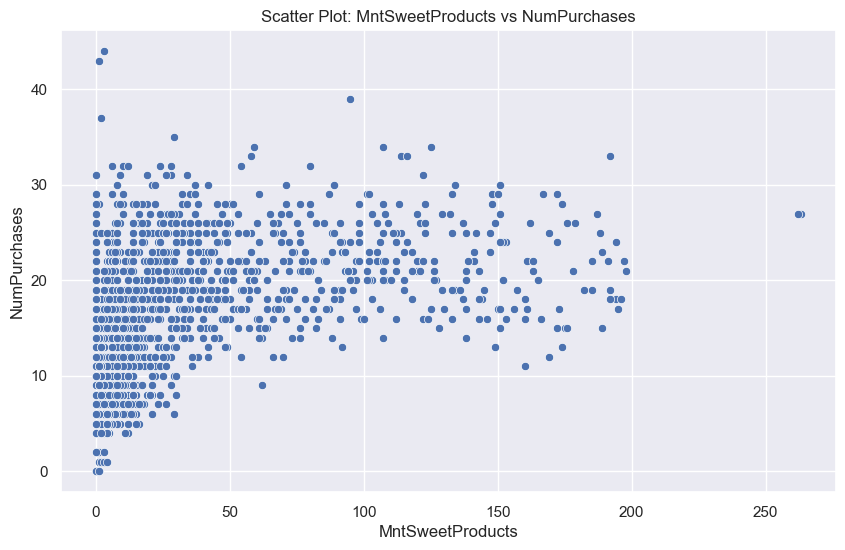

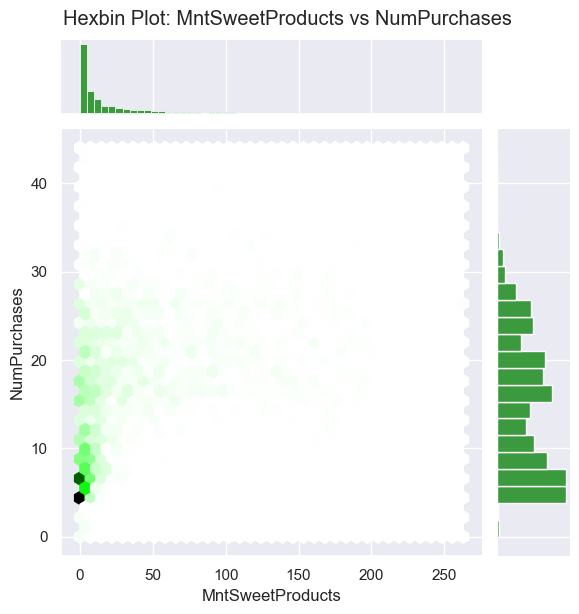

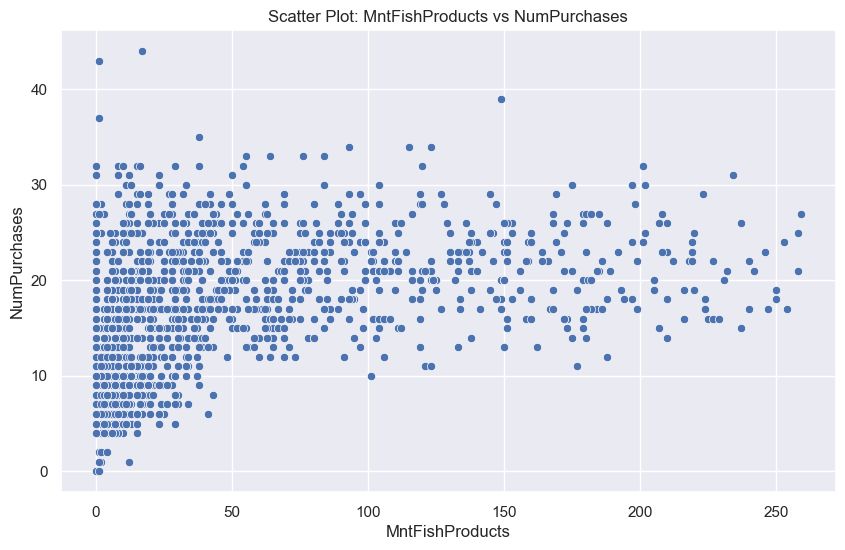

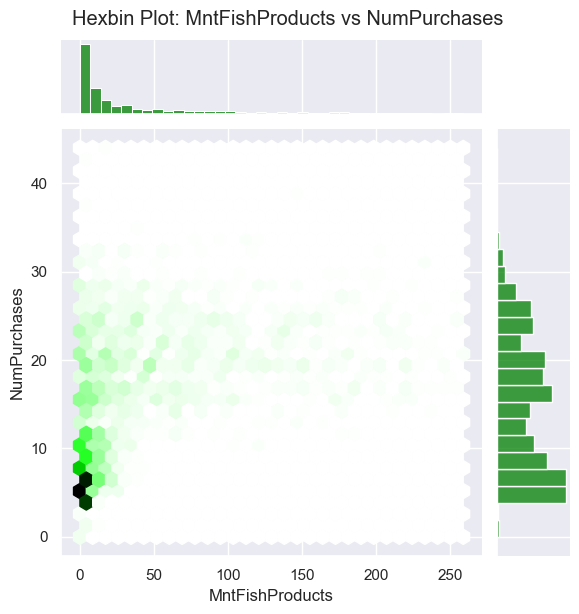

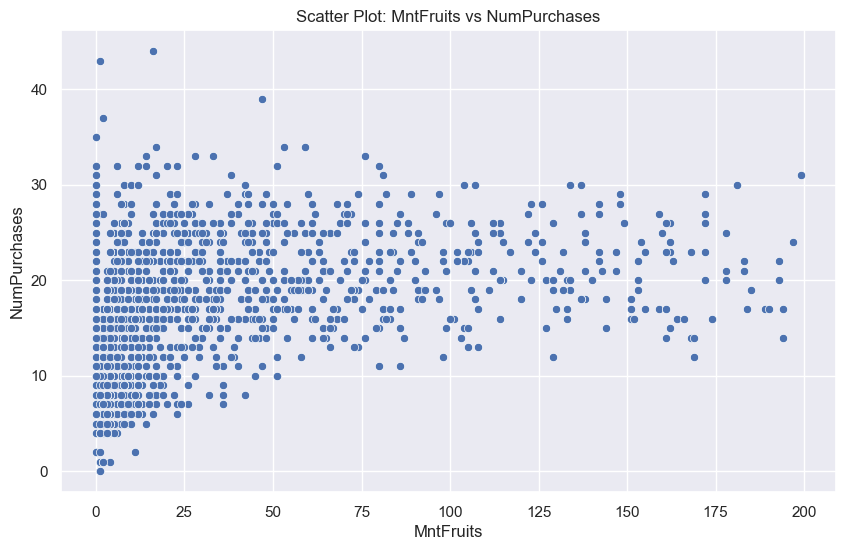

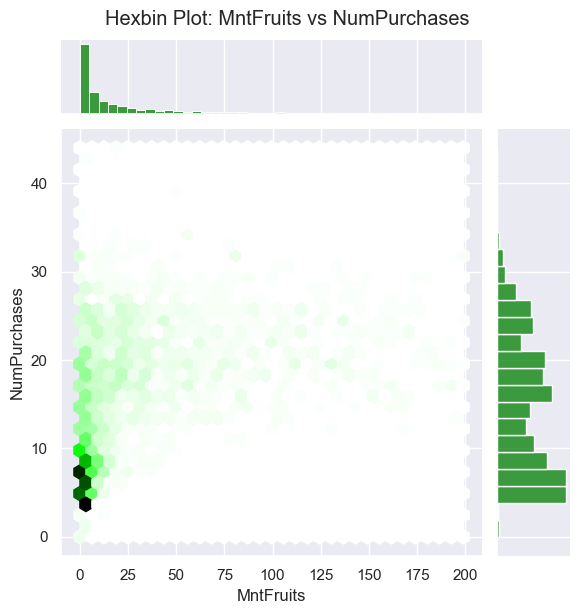

In [18]:
explore_relationship(df, selected_features)

## 6. Other insightful investigations



In [19]:
def box_plot(df, selected_features, target_col=TARGET_COLUMN):
    for feature in selected_features.index.to_list():
        sns.boxplot(x=target_col, y=feature, data=df)
        plt.title(f'Box Plot: {feature} vs {target_col}')
        plt.show()

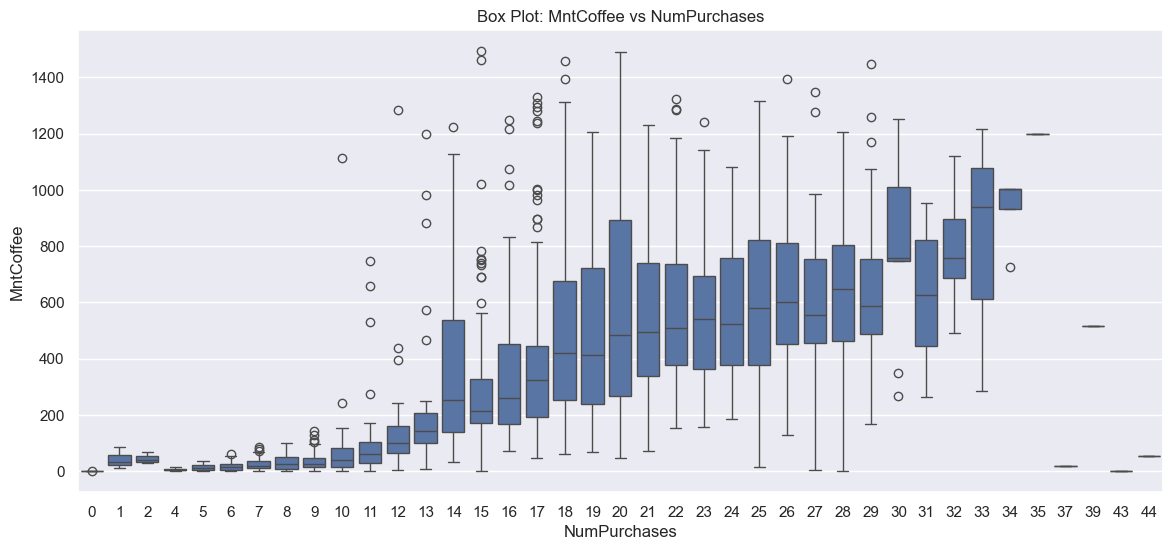

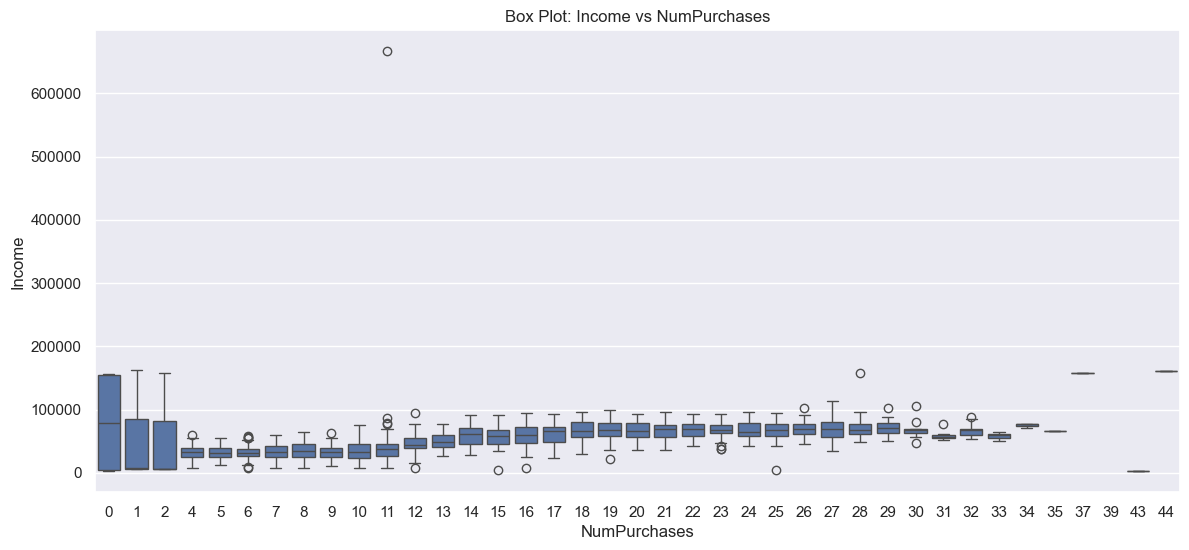

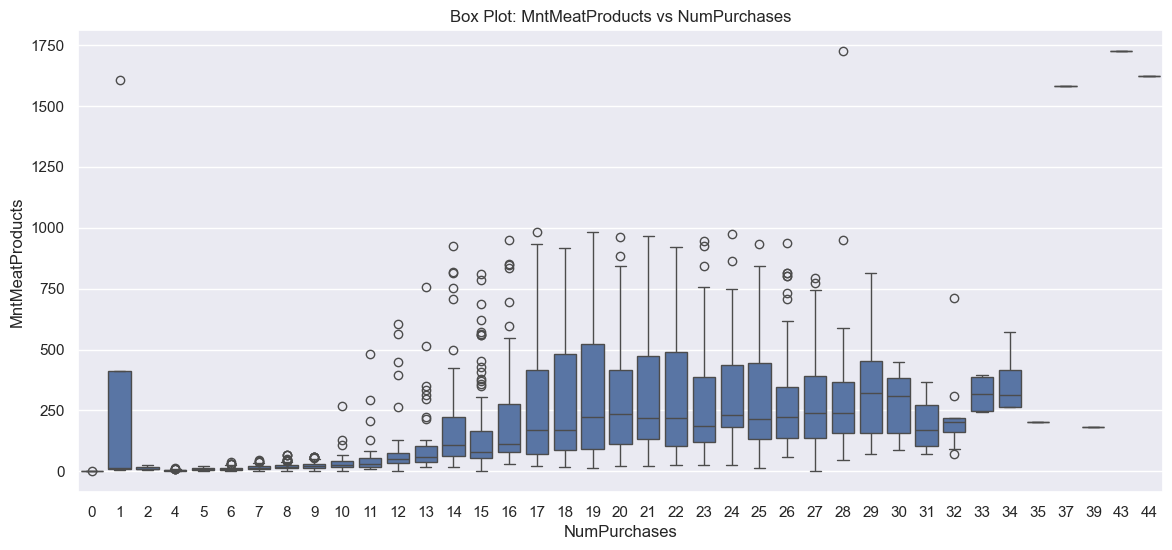

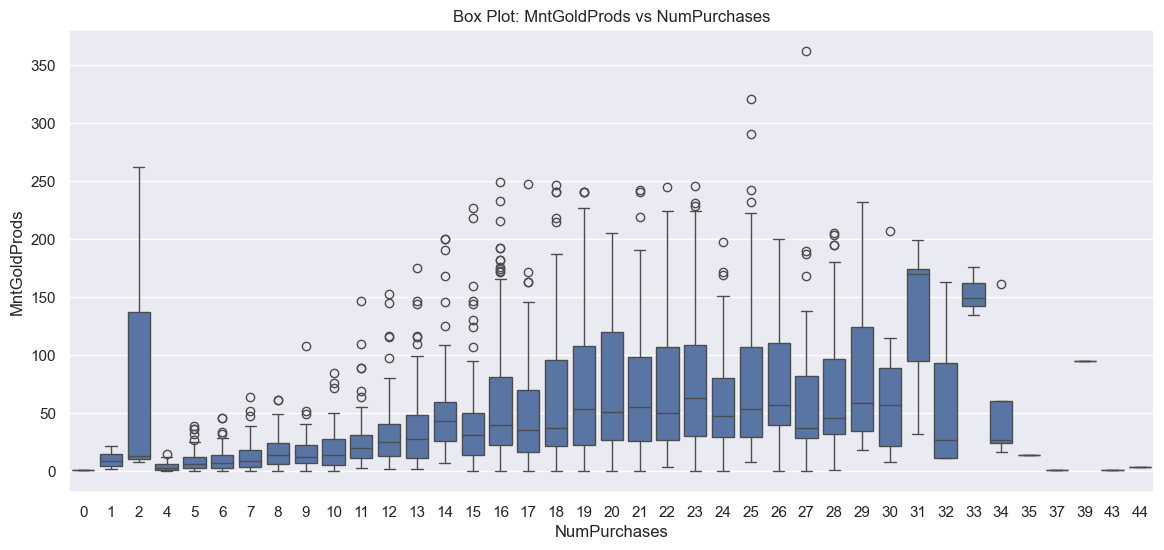

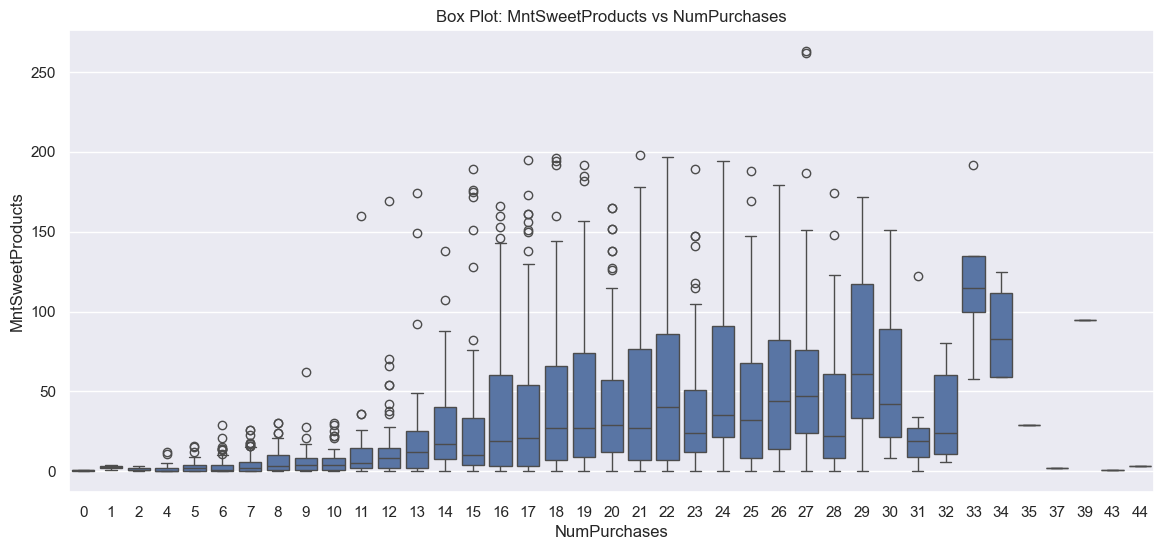

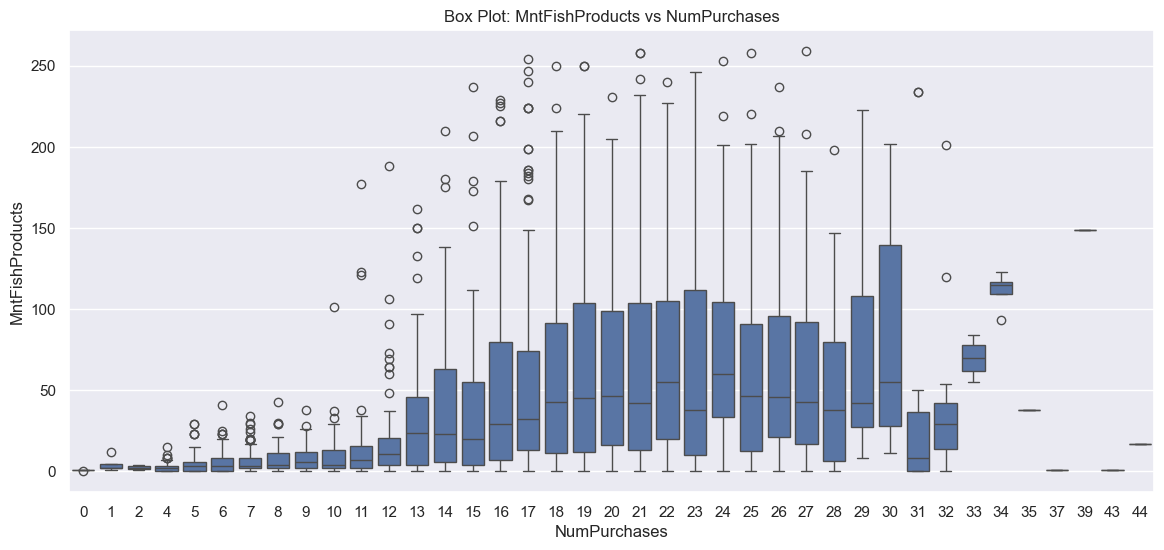

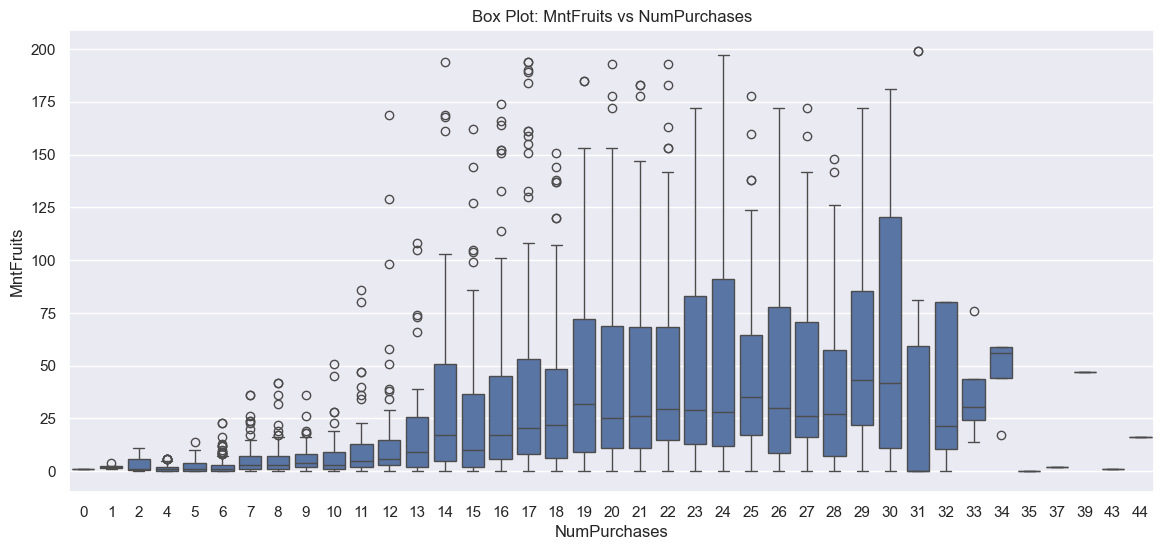

In [20]:
sns.set(rc={'figure.figsize': (14, 6)})
box_plot(df, selected_features)

In [21]:
# sns.set(rc={'figure.figsize': (14, 6)})
# # correlation_heatmap(df)
# plot_correlation_heatmap(df)

# Preprocessing Dataset

## 7. Other techniques to solve missing values problem


among several ways for handling this problem, Imputation and Dropping are explained here:

**Imputation**


All the missing values are replaced by a substitution.
Substitutions:

*   Mean

  > as the mean can represent the whole data, using the average to fill missing values is simple and proper.
  Median:
  As outlier data can affect the mean negatively, using a not-affected substitution like the median is proper.
*   Mode

  > In categorical data, in which the mean and median are not defined in them, Mode is preferred.

*   Random Fill:
  > filling missing values with randomly selected values between the column's minimum and maximum data could lead us to a good result.
*   Prediction

  > In this method, based on properties relating to the row, we predict the amount and with a good prediction, our total column is nearer to real properties.

---

**Dropping**

in this method, we can either drop columns or drop rows.

*   Dropping Columns

  > each column containing some missing value is dropped. As we lose some valuable values by dropping the whole column, this method should be applied in the case that the missing values of the column are the majority part of the whole data in that column. The reason is when the missing values are too many, there is less amount of reliable value to fill in missing values with good precision.
*   Dropping Row

  > This method is similar to the previous one in some ways, but this is considerable in that if what a column has is all missing values, then by applying this method, all rows of the table are gone!
  So it is better to apply on the rows with a majority of missing values.

## 8. Handling Missing Values in Dataframe

This is dataset:

In [22]:
missing_values(df)

Missing  Percentage
Unnamed: 0               0    0.000000
ID                       0    0.000000
Year_Birth               0    0.000000
Education                0    0.000000
Marital_Status           0    0.000000
Income                 223    0.099554
Kidhome                  0    0.000000
Teenhome                 0    0.000000
Dt_Customer              0    0.000000
Recency                  0    0.000000
MntCoffee              205    0.091518
MntFruits                0    0.000000
MntMeatProducts          0    0.000000
MntFishProducts          0    0.000000
MntSweetProducts         0    0.000000
MntGoldProds            13    0.005804
NumWebVisitsMonth      200    0.089286
Complain                 0    0.000000
NumPurchases             0    0.000000
UsedCampaignOffer        0    0.000000

First of all, i delete invalid values from columns, such as negative values for countable features like

In [23]:
pNegCols = ["UsedCampaignOffer", "NumPurchases", "Complain", "NumWebVisitsMonth", "MntGoldProds",
            "MntSweetProducts", "MntFishProducts", "MntMeatProducts", "MntFruits", "MntCoffee",
            "Recency", "Teenhome", "Kidhome", "Income", "Year_Birth", "ID"]

df[pNegCols] = np.where(df[pNegCols] < 0, np.nan, df[pNegCols])

In [24]:
missing_values(df)

Missing  Percentage
Unnamed: 0               0    0.000000
ID                       0    0.000000
Year_Birth               0    0.000000
Education                0    0.000000
Marital_Status           0    0.000000
Income                 223    0.099554
Kidhome                  4    0.001786
Teenhome                 0    0.000000
Dt_Customer              0    0.000000
Recency                  0    0.000000
MntCoffee              205    0.091518
MntFruits                0    0.000000
MntMeatProducts          0    0.000000
MntFishProducts          0    0.000000
MntSweetProducts         0    0.000000
MntGoldProds            13    0.005804
NumWebVisitsMonth      200    0.089286
Complain                 0    0.000000
NumPurchases             0    0.000000
UsedCampaignOffer        0    0.000000

As we can see the Kidhome column had some negative values and i set them to nan to fix it.

Respectively, `Income`, `MntCoffee`, and `NumWebVisitsMonth`, and then `MntGoldProds` have Missing values.

> here i used median to fill in the missing values in data frame:

In [25]:
def fillna_with_median(df):
    df.fillna(df.median(numeric_only=True), inplace=True)
    return df
def fill_with_mode(df):
    mode_values = df.mode(numeric_only=True).iloc[0]
    df.fillna(mode_values, inplace=True)

In [26]:
# fill_with_mode(df)
fillna_with_median(df)

missing_values(df)

Missing  Percentage
Unnamed: 0               0         0.0
ID                       0         0.0
Year_Birth               0         0.0
Education                0         0.0
Marital_Status           0         0.0
Income                   0         0.0
Kidhome                  0         0.0
Teenhome                 0         0.0
Dt_Customer              0         0.0
Recency                  0         0.0
MntCoffee                0         0.0
MntFruits                0         0.0
MntMeatProducts          0         0.0
MntFishProducts          0         0.0
MntSweetProducts         0         0.0
MntGoldProds             0         0.0
NumWebVisitsMonth        0         0.0
Complain                 0         0.0
NumPurchases             0         0.0
UsedCampaignOffer        0         0.0

> or we can simply delete the row containing more than two NaN values, and after deleting, use KNNImputer to fill the deleted rows.

## 9. Normalization and Standardization in Numerical Features

These techniques aim to bring the values of different features onto a similar scale.

- **Normalization:**
  - It scales the values of a feature to a specific range, often between 0 and 1.
  - The normalization formula for a numerical feature \(X\) is given by:
$$
Xnorm = \frac {X-Xmin} {Xmax-Xmin}
$$

where $X$ is the original value of the feature, $Xmin$ is the minimum value in the feature, and $Xmax$ is the maximum value in the feature.
  - Normalization is useful when the features have different ranges, and algorithms like neural networks or k-nearest neighbors may perform better when the input features are within a consistent scale.

- **Standardization:**
  - transforms the data to have a mean of 0 and a standard deviation of 1. It makes the distribution of each feature more interpretable and facilitates comparisons between different features.
$$
Z = \frac {X-Xmin} {Xstd}
$$
where $X$ is the original value of the feature, $Xmin$ is the minimum value in the feature, and $Xstd$ is the standard deviation.
  - Standardization is particularly useful when the features have different units or when features follow different distributions. It helps algorithms that rely on the assumption of a normal distribution.



---


as the numerical features in this dataset have different scles, normalizing or standardizing is beneficial.


In [27]:
def standardization(df, exclude_cols: list = []):
    numeric_cols = df.select_dtypes(include="number")
    df[numeric_cols.columns] = StandardScaler().fit_transform(numeric_cols)
    df[exclude_cols] = numeric_cols[exclude_cols]
    return df

def normalization(df, exclude_cols: list = []):
    numeric_cols = df.select_dtypes(include="number")
    df[numeric_cols.columns] = MinMaxScaler().fit_transform(numeric_cols)
    df[exclude_cols] = numeric_cols[exclude_cols]
    return df

def plot_histogram(df):
    df.hist(bins=20, figsize=(20,15))
    plt.show()

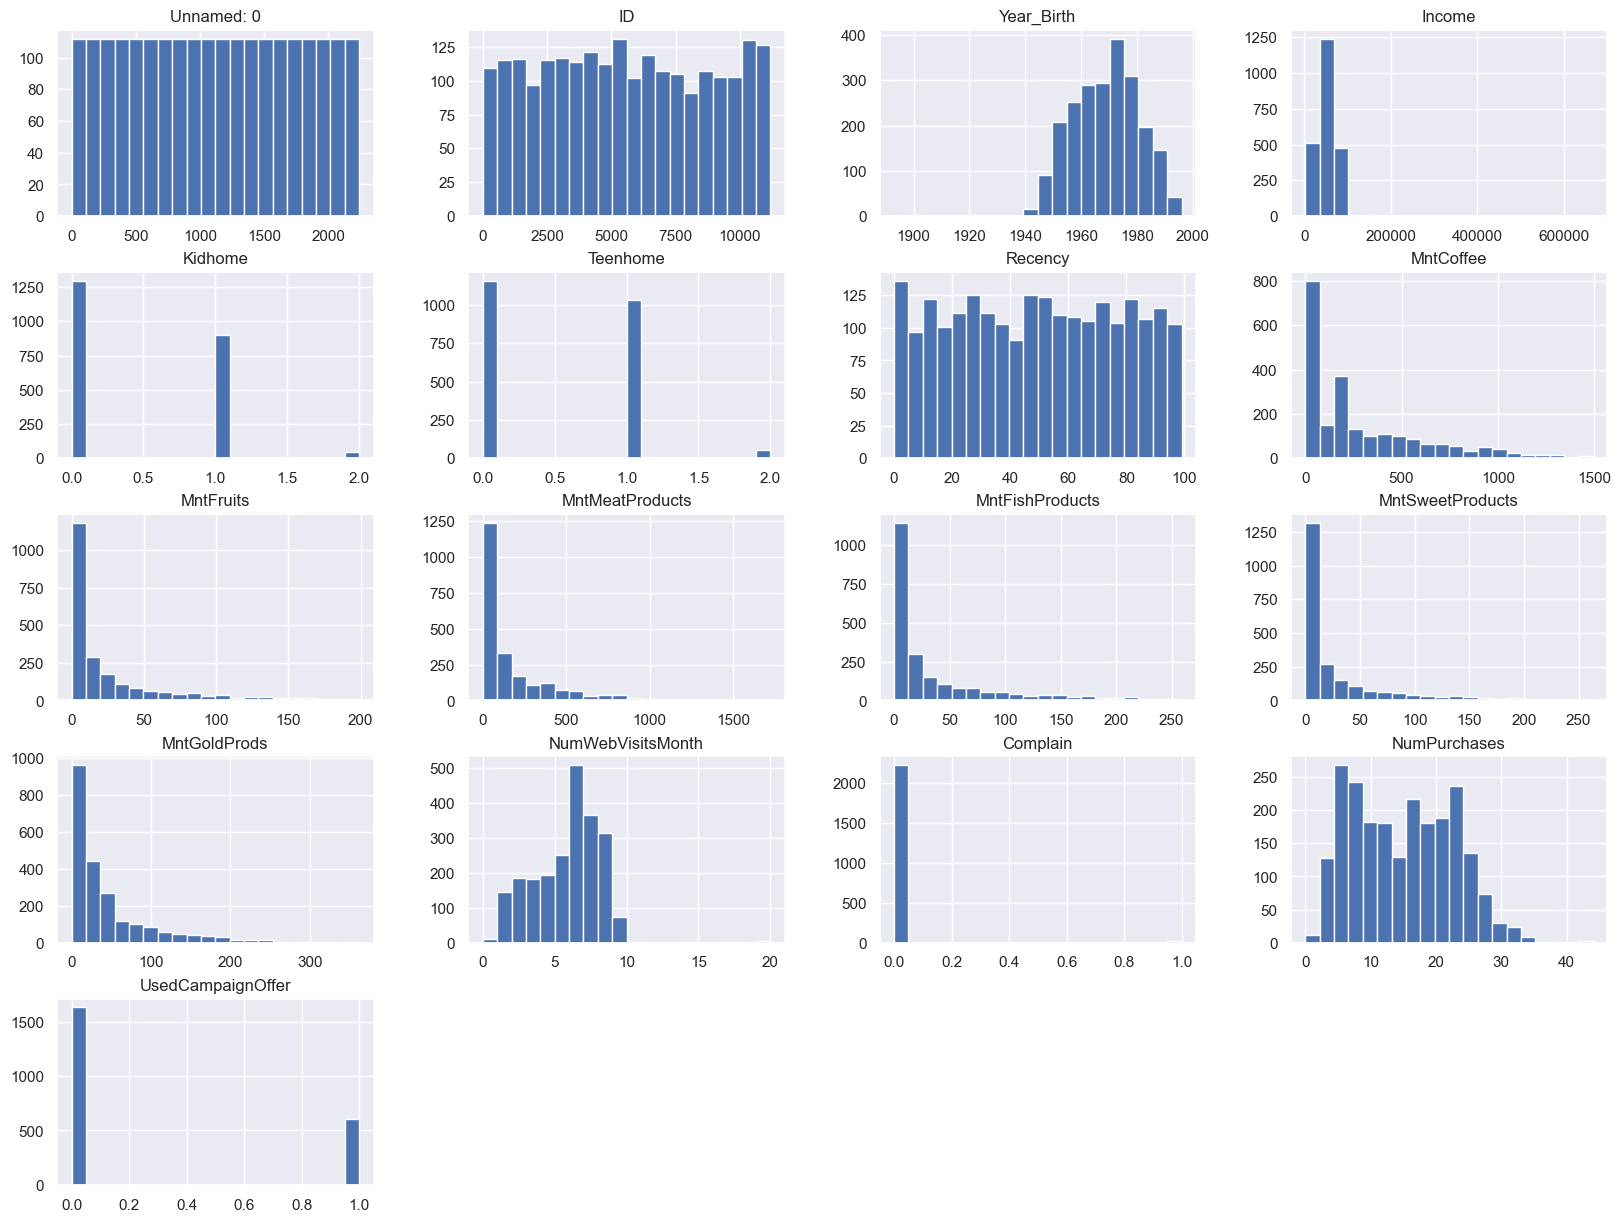

In [28]:
plot_histogram(df)

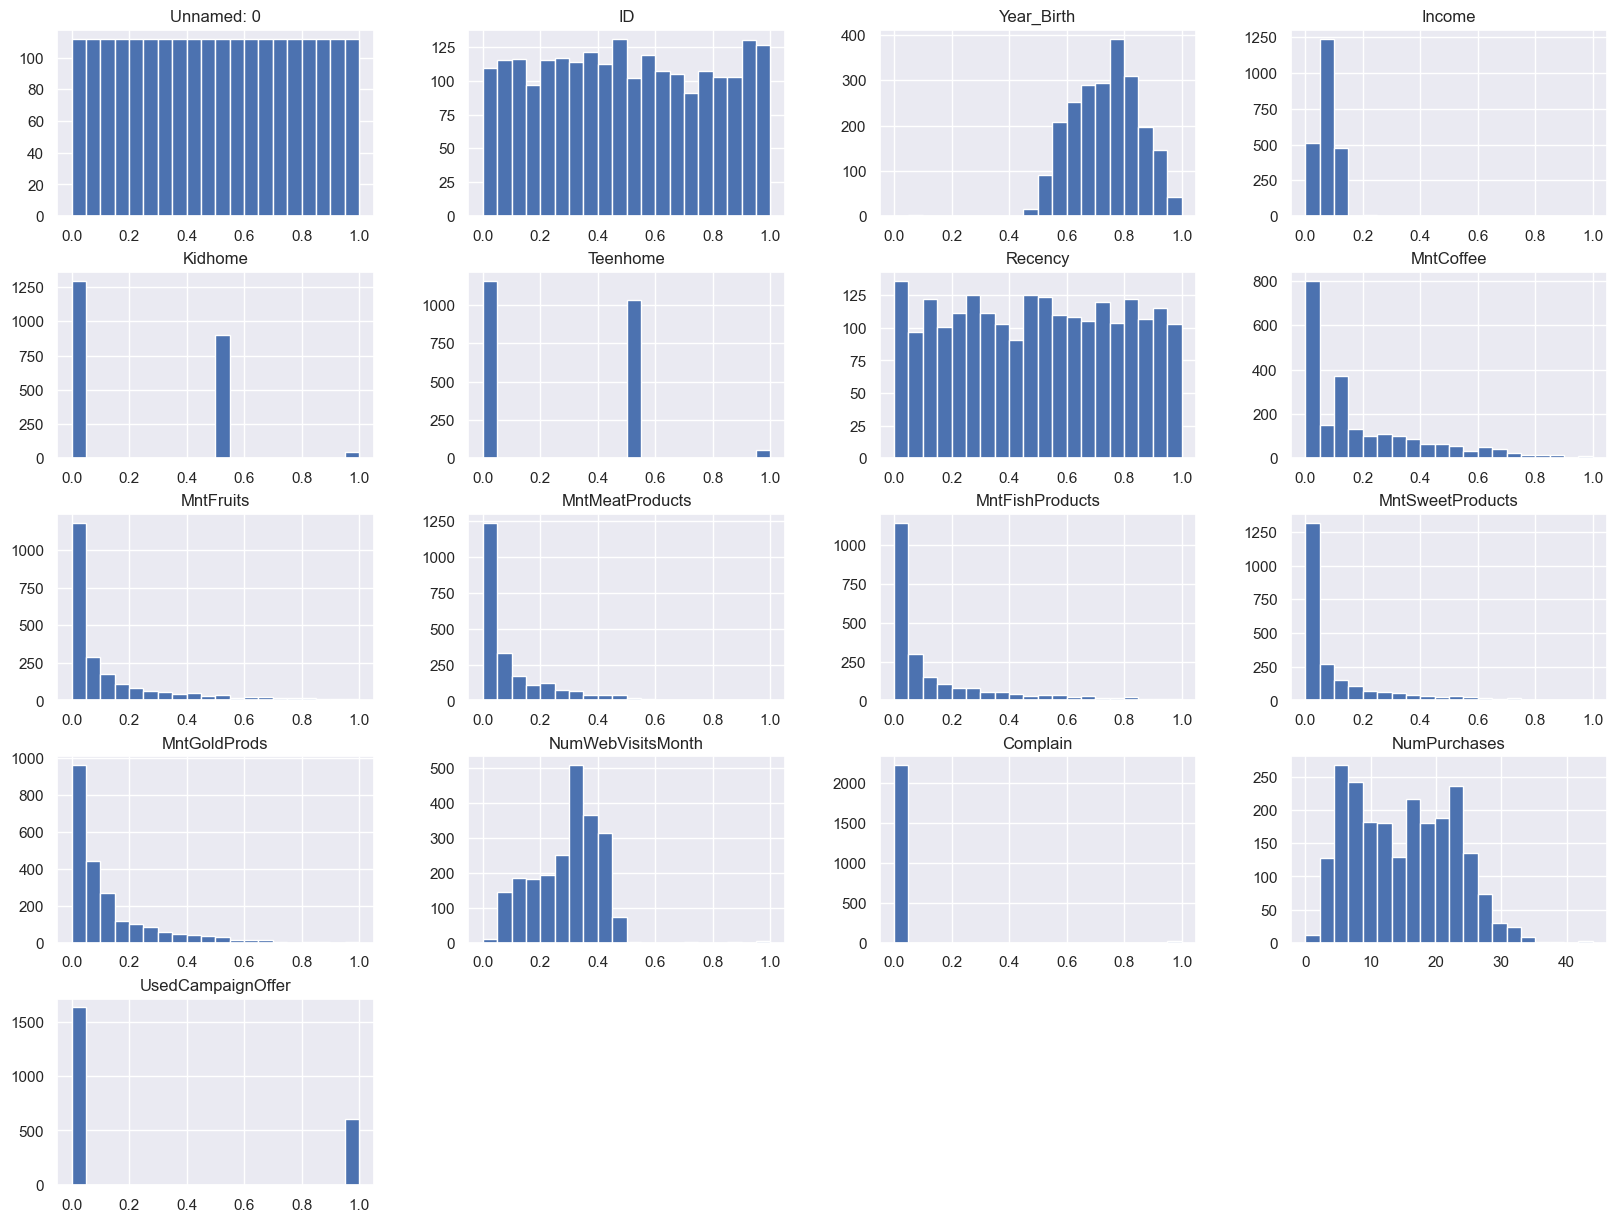

In [29]:
df = normalization(df, ['NumPurchases'])

plot_histogram(df)

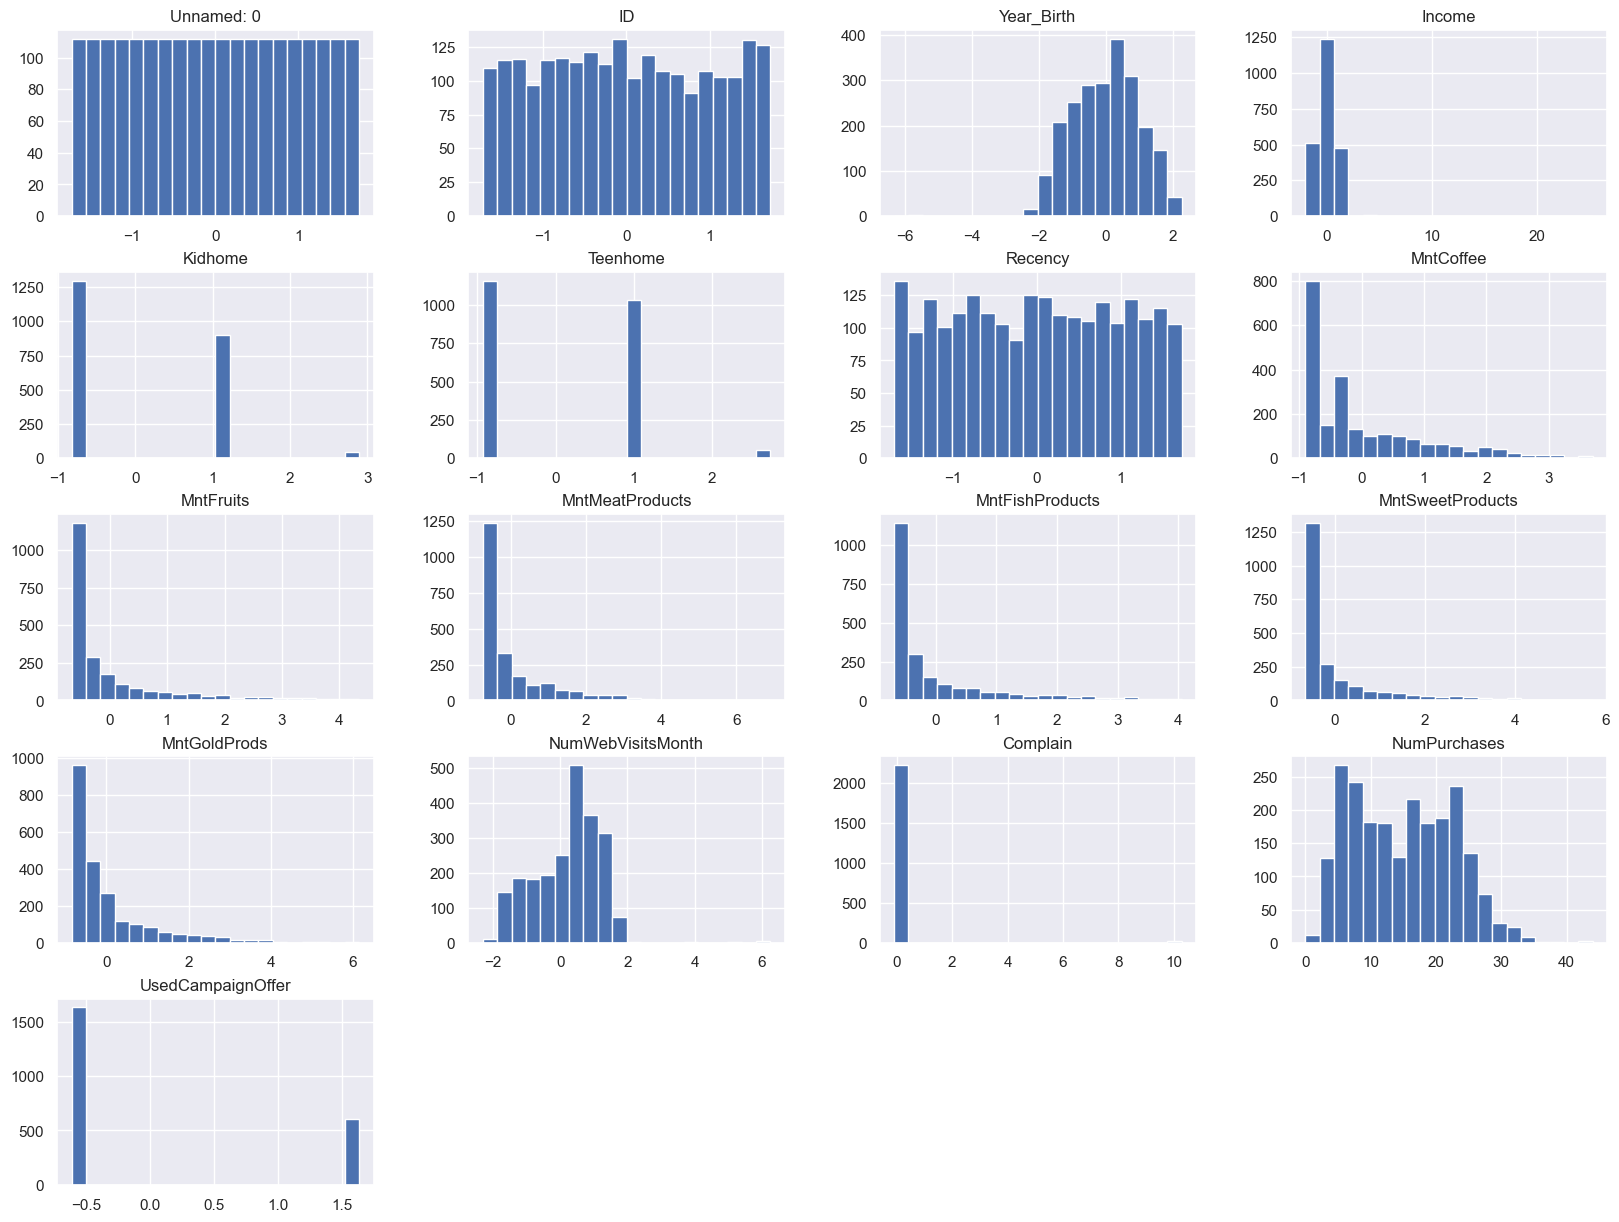

In [30]:
df = standardization(df, ['NumPurchases'])
plot_histogram(df)


In [31]:
df.describe()

Unnamed: 0            ID    Year_Birth        Income       Kidhome  \
count  2.240000e+03  2.240000e+03  2.240000e+03  2.240000e+03  2.240000e+03   
mean  -1.015061e-16 -9.198991e-17  4.452787e-16 -3.552714e-16  9.992007e-17   
std    1.000223e+00  1.000223e+00  1.000223e+00  1.000223e+00  1.000223e+00   
min   -1.731278e+00 -1.722818e+00 -6.326960e+00 -2.053225e+00 -8.237017e-01   
25%   -8.656389e-01 -8.514982e-01 -8.184192e-01 -6.304878e-01 -8.237017e-01   
50%   -9.616873e-17 -4.117757e-02  9.967091e-02 -3.448418e-02 -8.237017e-01   
75%    8.656389e-01  8.735813e-01  6.839101e-01  5.852568e-01  1.034397e+00   
max    1.731278e+00  1.724876e+00  2.269702e+00  2.535543e+01  2.892495e+00   

           Teenhome       Recency     MntCoffee     MntFruits  \
count  2.240000e+03  2.240000e+03  2.240000e+03  2.240000e+03   
mean  -3.172066e-18  1.292617e-16 -5.709718e-17 -6.819941e-17   
std    1.000223e+00  1.000223e+00  1.000223e+00  1.000223e+00   
min   -9.298944e-01 -1.696001e+00 -9.038860e-01 -6.614492e-01   
25%   -9.298944e-01 -8.671566e-01 -8.204773e-01 -6.363012e-01   
50%   -9.298944e-01 -3.777284e-03 -3.570960e-01 -4.602650e-01   
75%    9.069340e-01  8.596020e-01  5.140609e-01  1.684356e-01   
max    2.743762e+00  1.722981e+00  3.708303e+00  4.343008e+00   

       MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
count     2.240000e+03     2.240000e+03      2.240000e+03  2.240000e+03   
mean     -8.564578e-17    -1.015061e-16      2.537653e-17  9.198991e-17   
std       1.000223e+00     1.000223e+00      1.000223e+00  1.000223e+00   
min      -7.398135e-01    -6.870680e-01     -6.557331e-01 -8.449660e-01   
25%      -6.689119e-01    -6.321399e-01     -6.315032e-01 -6.710752e-01   
50%      -4.429132e-01    -4.673554e-01     -4.618937e-01 -3.812572e-01   
75%       2.882592e-01     2.284015e-01      1.438543e-01  2.370211e-01   
max       6.904261e+00     4.055064e+00      5.716737e+00  6.149307e+00   

       NumWebVisitsMonth      Complain  NumPurchases  UsedCampaignOffer  
count       2.240000e+03  2.240000e+03   2240.000000       2.240000e+03  
mean        4.440892e-17 -3.053113e-17     14.862054       3.806479e-17  
std         1.000223e+00  1.000223e+00      7.677173       1.000223e+00  
min        -2.306859e+00 -9.728167e-02      0.000000      -6.110569e-01  
25%        -5.939679e-01 -9.728167e-02      8.000000      -6.110569e-01  
50%         2.624776e-01 -9.728167e-02     15.000000      -6.110569e-01  
75%         6.907003e-01 -9.728167e-02     21.000000       1.636509e+00  
max         6.257596e+00  1.027943e+01     44.000000       1.636509e+00

## 10.

We should encode the categorical features.

- **One-Hot Encoding:**
  - Creating a new feature for each category
    > This method is useful when the categories don't have an order. It is the most useful method for the algorithms that use the distance between the data points, such as `KNN`. For example, if we have a feature with 3 categories, we can encode them as follows:  
    > Category 1: 1, 0, 0  
    > Category 2: 0, 1, 0  
    > Category 3: 0, 0, 1

- **Label Encoding:**
  - Assigning a number to each category
   > This method is useful when the categories have an order. For example, if we have a feature with 3 categories, we can encode them as follows:  
    > Category 1: 0  
    > Category 2: 1  
    > Category 3: 2

- **Binary Encoding:**
  - Encoding the categories using binary numbers
    > This method is useful when the categories don't have an order. It is somehow similar to the **One-Hot Encoding** method. For example, if we have a feature with 3 categories, we can encode them as follows:  
    > Category 1: 00  
    > Category 2: 01  
    > Category 3: 10
- **Frequency Encoding:**
  - Encoding the categories using the frequency of the categories
    > This method is useful when the categories don't have an order. For example, if we have a feature with 3 categories, we can encode them as follows:  
    > Category 1: 0.5  
    > Category 2: 0.25  
    > Category 3: 0.25

- **Target Encoding:**
  - Encoding the categories using the target mean of the categories
    > This method is useful when the categories don't have an order. For example, if we have a feature with 3 categories, we can encode them as follows:  
    > Category 1: 0.5  
    > Category 2: 0.25  
    > Category 3: 0.75

  

---

no, as all of the features are not categorical.

In [32]:
def handle_non_numeric_columns_label_encoding(df):
    label_encoder = LabelEncoder()
    for col in df.select_dtypes(exclude=['number']).columns:
        df[col] = label_encoder.fit_transform(df[col])
    return df

df = handle_non_numeric_columns_label_encoding(df)
df.describe()

Unnamed: 0            ID    Year_Birth    Education  Marital_Status  \
count  2.240000e+03  2.240000e+03  2.240000e+03  2240.000000     2240.000000   
mean  -1.015061e-16 -9.198991e-17  4.452787e-16     2.393750        3.729911   
std    1.000223e+00  1.000223e+00  1.000223e+00     1.124797        1.076277   
min   -1.731278e+00 -1.722818e+00 -6.326960e+00     0.000000        0.000000   
25%   -8.656389e-01 -8.514982e-01 -8.184192e-01     2.000000        3.000000   
50%   -9.616873e-17 -4.117757e-02  9.967091e-02     2.000000        4.000000   
75%    8.656389e-01  8.735813e-01  6.839101e-01     3.000000        5.000000   
max    1.731278e+00  1.724876e+00  2.269702e+00     4.000000        7.000000   

             Income       Kidhome      Teenhome  Dt_Customer       Recency  \
count  2.240000e+03  2.240000e+03  2.240000e+03  2240.000000  2.240000e+03   
mean  -3.552714e-16  9.992007e-17 -3.172066e-18   327.875446  1.292617e-16   
std    1.000223e+00  1.000223e+00  1.000223e+00   190.165575  1.000223e+00   
min   -2.053225e+00 -8.237017e-01 -9.298944e-01     0.000000 -1.696001e+00   
25%   -6.304878e-01 -8.237017e-01 -9.298944e-01   163.750000 -8.671566e-01   
50%   -3.448418e-02 -8.237017e-01 -9.298944e-01   326.000000 -3.777284e-03   
75%    5.852568e-01  1.034397e+00  9.069340e-01   485.000000  8.596020e-01   
max    2.535543e+01  2.892495e+00  2.743762e+00   662.000000  1.722981e+00   

          MntCoffee     MntFruits  MntMeatProducts  MntFishProducts  \
count  2.240000e+03  2.240000e+03     2.240000e+03     2.240000e+03   
mean  -5.709718e-17 -6.819941e-17    -8.564578e-17    -1.015061e-16   
std    1.000223e+00  1.000223e+00     1.000223e+00     1.000223e+00   
min   -9.038860e-01 -6.614492e-01    -7.398135e-01    -6.870680e-01   
25%   -8.204773e-01 -6.363012e-01    -6.689119e-01    -6.321399e-01   
50%   -3.570960e-01 -4.602650e-01    -4.429132e-01    -4.673554e-01   
75%    5.140609e-01  1.684356e-01     2.882592e-01     2.284015e-01   
max    3.708303e+00  4.343008e+00     6.904261e+00     4.055064e+00   

       MntSweetProducts  MntGoldProds  NumWebVisitsMonth      Complain  \
count      2.240000e+03  2.240000e+03       2.240000e+03  2.240000e+03   
mean       2.537653e-17  9.198991e-17       4.440892e-17 -3.053113e-17   
std        1.000223e+00  1.000223e+00       1.000223e+00  1.000223e+00   
min       -6.557331e-01 -8.449660e-01      -2.306859e+00 -9.728167e-02   
25%       -6.315032e-01 -6.710752e-01      -5.939679e-01 -9.728167e-02   
50%       -4.618937e-01 -3.812572e-01       2.624776e-01 -9.728167e-02   
75%        1.438543e-01  2.370211e-01       6.907003e-01 -9.728167e-02   
max        5.716737e+00  6.149307e+00       6.257596e+00  1.027943e+01   

       NumPurchases  UsedCampaignOffer  
count   2240.000000       2.240000e+03  
mean      14.862054       3.806479e-17  
std        7.677173       1.000223e+00  
min        0.000000      -6.110569e-01  
25%        8.000000      -6.110569e-01  
50%       15.000000      -6.110569e-01  
75%       21.000000       1.636509e+00  
max       44.000000       1.636509e+00

## 11. Feasibility of Column Deletion

Columns having low correlation with target can be removed.

In [33]:
df.describe()

Unnamed: 0            ID    Year_Birth    Education  Marital_Status  \
count  2.240000e+03  2.240000e+03  2.240000e+03  2240.000000     2240.000000   
mean  -1.015061e-16 -9.198991e-17  4.452787e-16     2.393750        3.729911   
std    1.000223e+00  1.000223e+00  1.000223e+00     1.124797        1.076277   
min   -1.731278e+00 -1.722818e+00 -6.326960e+00     0.000000        0.000000   
25%   -8.656389e-01 -8.514982e-01 -8.184192e-01     2.000000        3.000000   
50%   -9.616873e-17 -4.117757e-02  9.967091e-02     2.000000        4.000000   
75%    8.656389e-01  8.735813e-01  6.839101e-01     3.000000        5.000000   
max    1.731278e+00  1.724876e+00  2.269702e+00     4.000000        7.000000   

             Income       Kidhome      Teenhome  Dt_Customer       Recency  \
count  2.240000e+03  2.240000e+03  2.240000e+03  2240.000000  2.240000e+03   
mean  -3.552714e-16  9.992007e-17 -3.172066e-18   327.875446  1.292617e-16   
std    1.000223e+00  1.000223e+00  1.000223e+00   190.165575  1.000223e+00   
min   -2.053225e+00 -8.237017e-01 -9.298944e-01     0.000000 -1.696001e+00   
25%   -6.304878e-01 -8.237017e-01 -9.298944e-01   163.750000 -8.671566e-01   
50%   -3.448418e-02 -8.237017e-01 -9.298944e-01   326.000000 -3.777284e-03   
75%    5.852568e-01  1.034397e+00  9.069340e-01   485.000000  8.596020e-01   
max    2.535543e+01  2.892495e+00  2.743762e+00   662.000000  1.722981e+00   

          MntCoffee     MntFruits  MntMeatProducts  MntFishProducts  \
count  2.240000e+03  2.240000e+03     2.240000e+03     2.240000e+03   
mean  -5.709718e-17 -6.819941e-17    -8.564578e-17    -1.015061e-16   
std    1.000223e+00  1.000223e+00     1.000223e+00     1.000223e+00   
min   -9.038860e-01 -6.614492e-01    -7.398135e-01    -6.870680e-01   
25%   -8.204773e-01 -6.363012e-01    -6.689119e-01    -6.321399e-01   
50%   -3.570960e-01 -4.602650e-01    -4.429132e-01    -4.673554e-01   
75%    5.140609e-01  1.684356e-01     2.882592e-01     2.284015e-01   
max    3.708303e+00  4.343008e+00     6.904261e+00     4.055064e+00   

       MntSweetProducts  MntGoldProds  NumWebVisitsMonth      Complain  \
count      2.240000e+03  2.240000e+03       2.240000e+03  2.240000e+03   
mean       2.537653e-17  9.198991e-17       4.440892e-17 -3.053113e-17   
std        1.000223e+00  1.000223e+00       1.000223e+00  1.000223e+00   
min       -6.557331e-01 -8.449660e-01      -2.306859e+00 -9.728167e-02   
25%       -6.315032e-01 -6.710752e-01      -5.939679e-01 -9.728167e-02   
50%       -4.618937e-01 -3.812572e-01       2.624776e-01 -9.728167e-02   
75%        1.438543e-01  2.370211e-01       6.907003e-01 -9.728167e-02   
max        5.716737e+00  6.149307e+00       6.257596e+00  1.027943e+01   

       NumPurchases  UsedCampaignOffer  
count   2240.000000       2.240000e+03  
mean      14.862054       3.806479e-17  
std        7.677173       1.000223e+00  
min        0.000000      -6.110569e-01  
25%        8.000000      -6.110569e-01  
50%       15.000000      -6.110569e-01  
75%       21.000000       1.636509e+00  
max       44.000000       1.636509e+00

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2240 non-null   float64
 1   ID                 2240 non-null   float64
 2   Year_Birth         2240 non-null   float64
 3   Education          2240 non-null   int32  
 4   Marital_Status     2240 non-null   int32  
 5   Income             2240 non-null   float64
 6   Kidhome            2240 non-null   float64
 7   Teenhome           2240 non-null   float64
 8   Dt_Customer        2240 non-null   int32  
 9   Recency            2240 non-null   float64
 10  MntCoffee          2240 non-null   float64
 11  MntFruits          2240 non-null   float64
 12  MntMeatProducts    2240 non-null   float64
 13  MntFishProducts    2240 non-null   float64
 14  MntSweetProducts   2240 non-null   float64
 15  MntGoldProds       2240 non-null   float64
 16  NumWebVisitsMonth  2240 

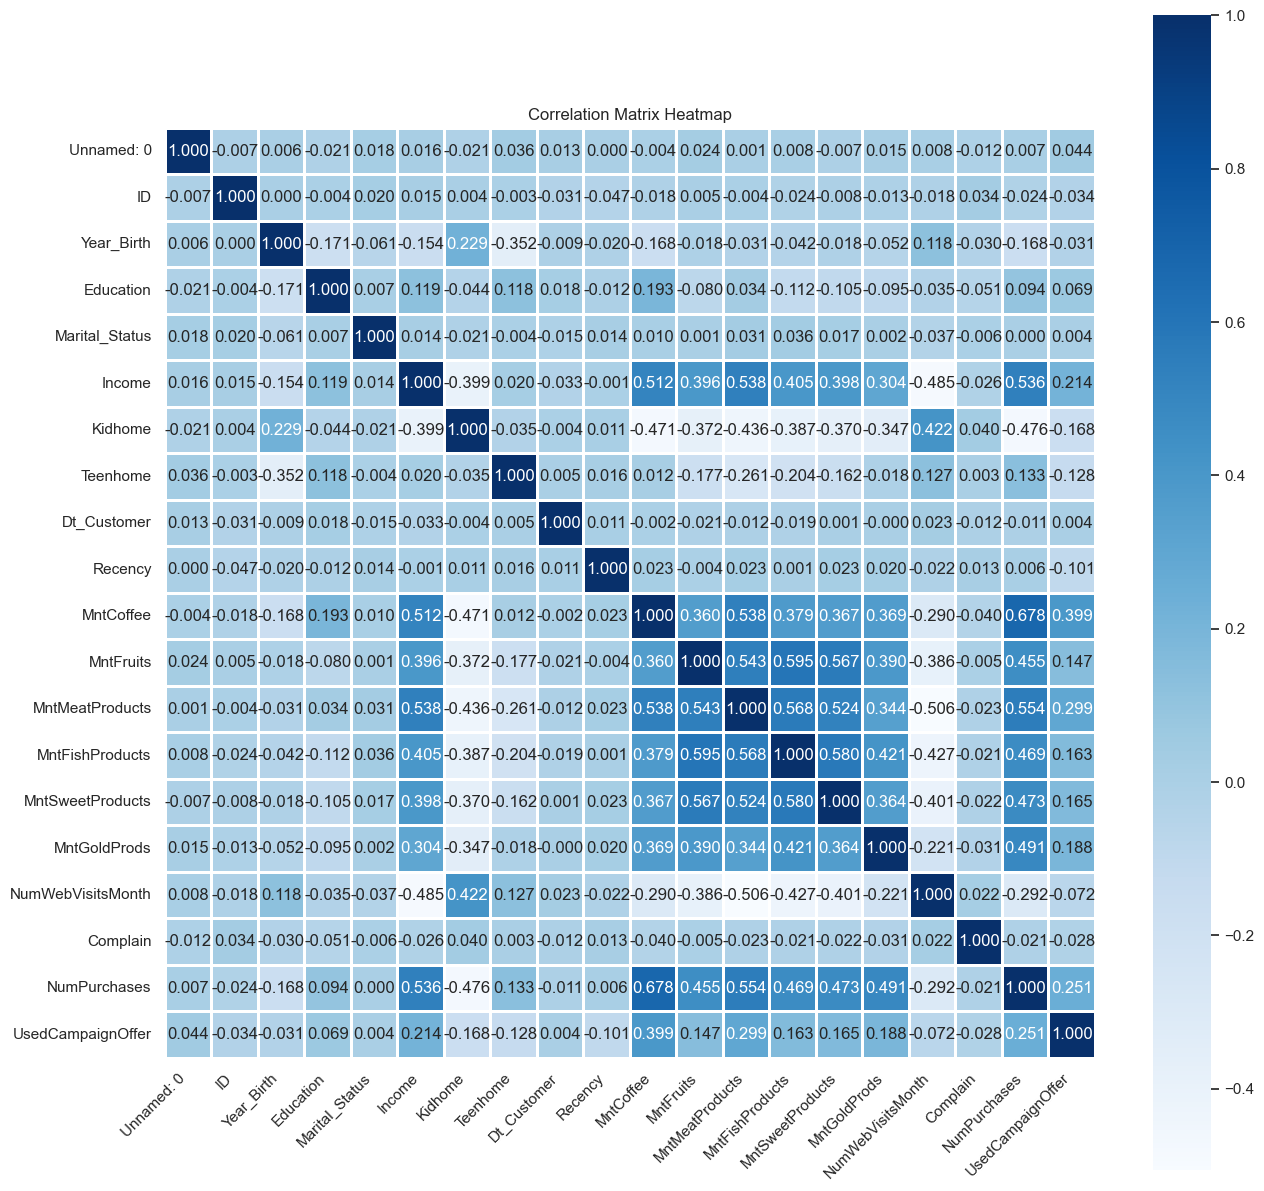

In [35]:
plot_correlation_heatmap(df)

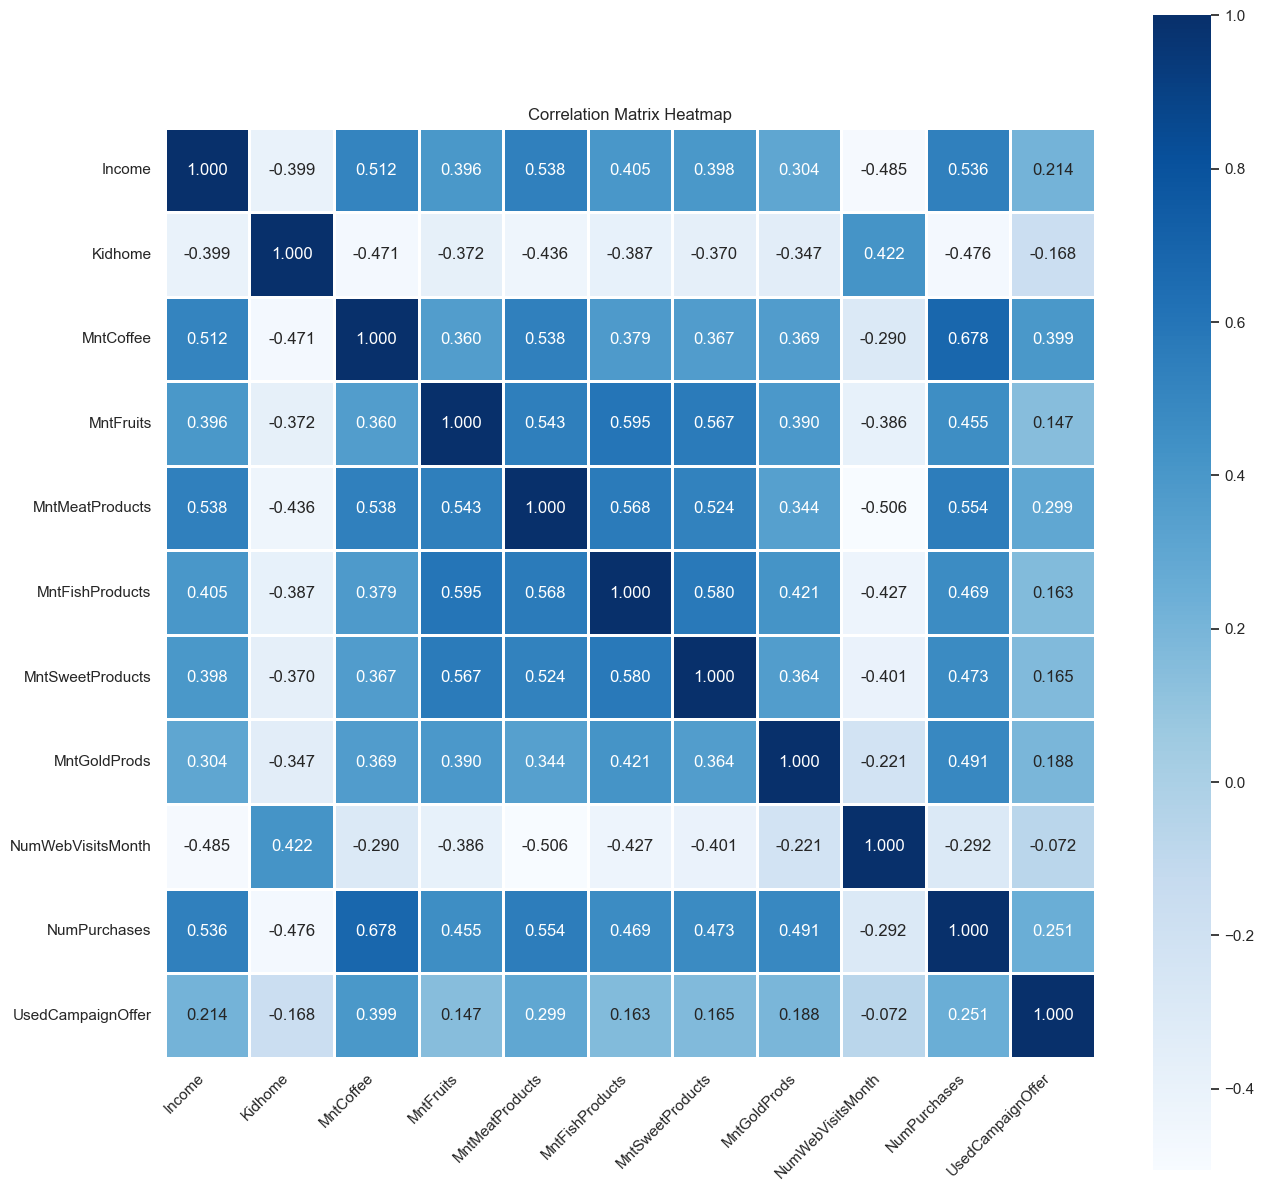

In [36]:
def remove_low_correlation_columns(df, threshold=0.2):
    correlation_matrix = df.corr()
    correlations_with_target = correlation_matrix['NumPurchases']
    correlation_threshold = 0.2
    low_correlation_features = correlations_with_target[abs(correlations_with_target) < correlation_threshold].index
    df.drop(low_correlation_features, axis=1, inplace=True)

remove_low_correlation_columns(df)
plot_correlation_heatmap(df)

In [37]:
df.describe()

Income       Kidhome     MntCoffee     MntFruits  \
count  2.240000e+03  2.240000e+03  2.240000e+03  2.240000e+03   
mean  -3.552714e-16  9.992007e-17 -5.709718e-17 -6.819941e-17   
std    1.000223e+00  1.000223e+00  1.000223e+00  1.000223e+00   
min   -2.053225e+00 -8.237017e-01 -9.038860e-01 -6.614492e-01   
25%   -6.304878e-01 -8.237017e-01 -8.204773e-01 -6.363012e-01   
50%   -3.448418e-02 -8.237017e-01 -3.570960e-01 -4.602650e-01   
75%    5.852568e-01  1.034397e+00  5.140609e-01  1.684356e-01   
max    2.535543e+01  2.892495e+00  3.708303e+00  4.343008e+00   

       MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
count     2.240000e+03     2.240000e+03      2.240000e+03  2.240000e+03   
mean     -8.564578e-17    -1.015061e-16      2.537653e-17  9.198991e-17   
std       1.000223e+00     1.000223e+00      1.000223e+00  1.000223e+00   
min      -7.398135e-01    -6.870680e-01     -6.557331e-01 -8.449660e-01   
25%      -6.689119e-01    -6.321399e-01     -6.315032e-01 -6.710752e-01   
50%      -4.429132e-01    -4.673554e-01     -4.618937e-01 -3.812572e-01   
75%       2.882592e-01     2.284015e-01      1.438543e-01  2.370211e-01   
max       6.904261e+00     4.055064e+00      5.716737e+00  6.149307e+00   

       NumWebVisitsMonth  NumPurchases  UsedCampaignOffer  
count       2.240000e+03   2240.000000       2.240000e+03  
mean        4.440892e-17     14.862054       3.806479e-17  
std         1.000223e+00      7.677173       1.000223e+00  
min        -2.306859e+00      0.000000      -6.110569e-01  
25%        -5.939679e-01      8.000000      -6.110569e-01  
50%         2.624776e-01     15.000000      -6.110569e-01  
75%         6.907003e-01     21.000000       1.636509e+00  
max         6.257596e+00     44.000000       1.636509e+00

## 12. Splitting the dataset into train and test sets

Some common percentages for splitting the dataset into train and test sets:

- $90\%$ `train` and $10\%$ `test`
- $80\%$ `train` and $20\%$ `test`
- $70\%$ `train` and $30\%$ `test`
- $60\%$ `train` and $40\%$ `test`

Some ways to split data into training and test sets:

* Randomly split the dataset into train and test sets
    > This method is the most common. But it has a problem. If we split the dataset randomly, the train and test sets may not have the same distribution.

* Split the dataset based on the time
    > This method is useful when we have a time series dataset. But it is not useful in this case.

* Split the dataset based on the target
    > This method is useful when we have an imbalanced dataset.

some of the most commonly used methods for random dataset splitting are outlined below:
* `train_test_split` method of the `scikit-learn` library

* `randn` method of the `numpy` library

* `sample` method of the `pandas` library

In [38]:
def split_data(df: pd.DataFrame, target_column: str = TARGET_COLUMN, train_percent: float = 0.8, random_state: int = 1):
    data = df[df.columns.difference([target_column])]
    outcome_data = df[target_column]

    data_train, data_test, outcome_train, outcome_test = train_test_split(
        data, outcome_data, train_size=train_percent, random_state=random_state)

    return data_train, data_test, outcome_train, outcome_test

x_train, x_test, y_train, y_test = split_data(df)

> I set the random_state as 42 to make the dataset reproducible. It is used as a seed for a random number generator.

> $20\%$ of the data will be used for testing, and the remaining $80\%$ will be used for training.

## 13.

A validation set is used to evaluate the performance of the model and prevent overfitting. It is used to test the trained model before using the testing data. We usually use this set to tune the hyperparameters of the model.

## 14. K-Fold Cross Validation

This method makes a pratition on dataset int ok equally sized golds. In this case, the model is trained and evaluated k times, each time using a different fold as the test set and the remaining folds as the training set. This process helps assess the model's performance across different subsets of the data.

* Partitioning the Data:
> * The dataset is divided into k equally sized folds.
> * Each fold serves as a test set while the remaining k-1 folds are used for training.

* Training and Evaluation:
> * The model is trained on the training set (k-1 folds).
> * The trained model is then evaluated on the test set (the remaining fold).

* Iteration:
> * Steps 1 and 2 are repeated k times, with each of the k folds used exactly once as the test set.

* Performance Metrics:
> * The performance metrics (e.g., accuracy, precision, recall) from each iteration are averaged to obtain a more robust evaluation of the model.


K-fold cross-validation provides a more reliable estimate of model performance compared to a single train-test split. It helps ensure that the model's performance is consistent across different subsets of the dat

It is commonly used for hyperparameter tuning, helping to find the optimal set of hyperparameters that generalize well to different data samples.

# Training, Evaluation, and Tuning

# Linear Regression

## 15.

Main form of simple linear regression function:
$$f(x) = \alpha x + \beta$$

here we want to find the bias ($\alpha$) and slope($\beta$) by minimizing the derivation of the Residual Sum of Squares (RSS) function:

- step 1: Compute RSS of the training data  

$$ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} * x_i) )^2 $$

- step 2: Compute the derivatives of the RSS function in terms of $\alpha$ and $\beta$, and set them equal to 0 to find the desired parameters

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} * x_i) = 0$$
$$ \to \beta = \hat{y} - \hat{\alpha} \hat{x} \to (1)$$


$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$

$$ (1) , (2) \to \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$
$$ \hat{\beta} = y - \hat{a} x$$



## 16. Selecting the Most Informative Feature for Linear Regression of Order 1

Since the MntCoffee feature has the most correlation with the target column, it is the best practice to use it for Linear Regression of Order 1.

## 17.

## 18.

Based on the above formula, implement the function below to compute the parameters of a simple linear regression


---

$\beta$ = $\frac{\sum_{i=1}^{n} (x_iy_i) - \frac{1}{n}\sum_{i=1}^{n}x_i\sum_{i=1}^{n}y_i}{\sum_{i=1}^{n}x_i^2 - \frac{1}{n}(\sum_{i=1}^{n}x_i)^2}$

$\alpha$ = $\frac{1}{n}\sum_{i=1}^{n}y_i - \beta \frac{1}{n}\sum_{i=1}^{n}x_i$


Here, I used columns with the most correlations, but the focus is on MntCoffee

In [39]:
selected_features = select_features_by_correlation(df, TARGET_COLUMN, 0.25, 0.477)
display(selected_features)

MntCoffee          0.678082
MntMeatProducts    0.554229
Income             0.535685
MntGoldProds       0.490752
Name: NumPurchases, dtype: float64

In [40]:
selected_features.describe()

count    4.000000
mean     0.564687
std      0.080157
min      0.490752
25%      0.524452
50%      0.544957
75%      0.585192
max      0.678082
Name: NumPurchases, dtype: float64

### Simple Linear Regression

In [41]:
def simple_linear_regression(input_feature, output):
    sum_x = np.sum(input_feature)
    sum_y = np.sum(output)
    # sum_x = input_feature.sum()
    # sum_y = output.sum()

    sum_xy = np.sum(input_feature * output)
    sum_xx = np.sum(input_feature * input_feature)
    # sum_xy = (input_feature * output).sum()
    # sum_xx = (input_feature * input_feature).sum()

    slope = (sum_xy - (sum_x * sum_y) / len(input_feature)) / (sum_xx - (sum_x * sum_x) / len(input_feature))
    intercept = sum_y / len(input_feature) - slope * sum_x / len(input_feature)

    return (intercept, slope)
#           alpha      betta


### Get Regression Predictions

Now complete this `get_regression_predictions(...)` function to predict the value of given data based on the calculated intercept and slope


---

$\hat{y}$ = $\beta_0$ + $\beta_1 x$

In [42]:
def get_regression_predictions(input_feature, bias, slope):
#                                             betta alpha
    predicted_values = bias + slope * input_feature
    return predicted_values


### Get Root Mean Square Error

Now that we have a model and can make predictions, let's evaluate our model using Root Mean Square Error (RMSE). RMSE is the square root of the mean of the squared differences between the residuals, and the residuals is just a fancy word for the difference between the predicted output and the true output.

Complete the following function to compute the RSME of a simple linear regression model given the input_feature, output, intercept and slope:


---

$RMSE$ =  $\sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}$

In [43]:
def get_root_mean_square_error(predicted_values, outputs):
    squared_diffs = [(predicted - actual)**2 for predicted, actual in zip(predicted_values, outputs)]
    mean_squared_diff = sum(squared_diffs) / len(squared_diffs)
    rmse = mean_squared_diff**0.5
    return rmse

### Get R2 Score

The RMSE has no bound, thus it becomes challenging to determine whether a particular RMSE value is considered good or bad without any reference point. Instead, we use R2 score. The R2 score is calculated by comparing the sum of the squared differences between the actual and predicted values of the dependent variable to the total sum of squared differences between the actual and mean values of the dependent variable. The R2 score is formulated as below:

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

Complete the following function to calculate the R2 score of a given input_feature, output, bias, and slope:

In [44]:
def get_r2_score(predicted_values, outputs):
    residuals = outputs - predicted_values

    SSres = np.sum(residuals ** 2)

    SStot = np.sum((outputs - np.mean(outputs)) ** 2)

    R2_score = 1 - SSres / SStot

    return R2_score

### Algorithm

Now calculate the fitness of the model.
Remember to provide explanation for the outputs in your code!


---

$\beta$ = $\frac{\sum_{i=1}^{n} (x_iy_i) - \frac{1}{n}\sum_{i=1}^{n}x_i\sum_{i=1}^{n}y_i}{\sum_{i=1}^{n}x_i^2 - \frac{1}{n}(\sum_{i=1}^{n}x_i)^2}$

$\alpha = \frac{1}{n}\sum_{i=1}^{n}y_i - \beta \frac{1}{n}\sum_{i=1}^{n}x_i$


$\hat{y}$ = $4\alpha + \beta x$


$RMSE$ = $\sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}$


$R2$ = $1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}$

In [45]:
def split_data(df: pd.DataFrame, target_column: str = TARGET_COLUMN, train_percent: float = 0.8, random_state: int = 1):
    data = df[df.columns.difference([target_column])]
    outcome_data = df[target_column]

    data_train, data_test, outcome_train, outcome_test = train_test_split(
        data, outcome_data, train_size=train_percent, random_state=random_state)

    return data_train, data_test, outcome_train, outcome_test

x_train, x_test, y_train, y_test = split_data(df)

In [46]:
def log_parameters(feature, RMSE, R2_score, intercept, slope):
    print(f"Feature  :{feature}")
    print(f"RMSE     :{RMSE:0.3f}")
    print(f"R2 Score :{R2_score:0.3f}")
    print(f"y = {intercept:0.3f} * x + {slope:0.3f}")
    print("--------------------------------------------")

def plot_regression_line(x_test, y_test, feature, predicted_values):
    plt.figure(figsize=(6, 4))
    plt.scatter(x_test[feature], y_test, label="Actual Data")
    plt.plot(x_test[feature], predicted_values, color='red', label="Regression Line")
    plt.title(f"Regression Line for {feature}")
    plt.xlabel(feature)
    plt.ylabel(TARGET_COLUMN)
    plt.legend()
    plt.show()

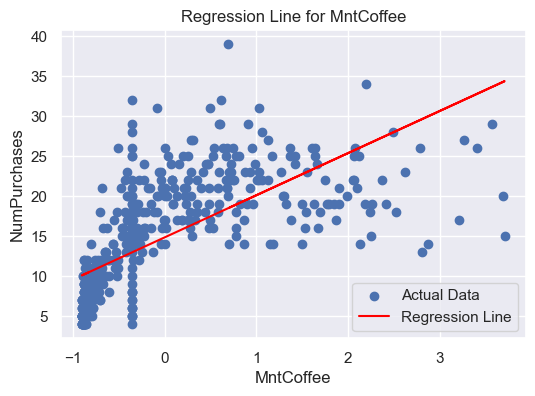

Feature  :MntCoffee
RMSE     :5.502
R2 Score :0.439
y = 14.864 * x + 5.264
--------------------------------------------


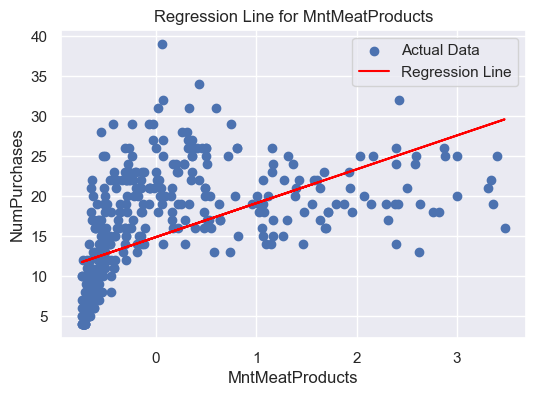

Feature  :MntMeatProducts
RMSE     :6.097
R2 Score :0.311
y = 14.889 * x + 4.238
--------------------------------------------


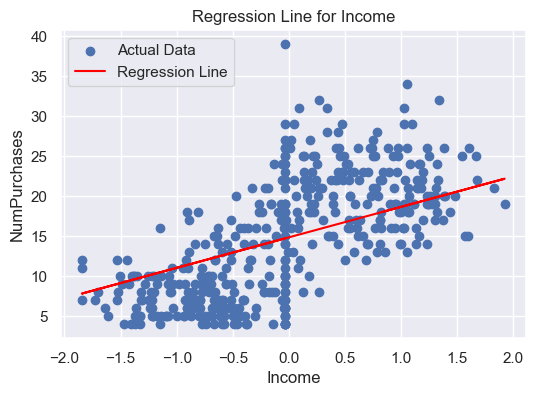

Feature  :Income
RMSE     :5.720
R2 Score :0.393
y = 14.864 * x + 3.812
--------------------------------------------


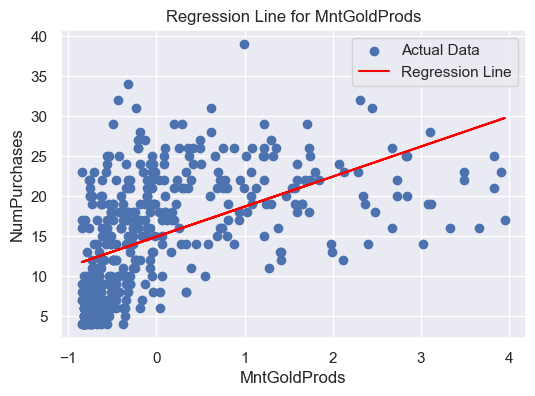

Feature  :MntGoldProds
RMSE     :6.257
R2 Score :0.274
y = 14.943 * x + 3.759
--------------------------------------------


In [47]:
for feature in selected_features.index:
    intercept, slope = simple_linear_regression(x_train[feature], y_train)
    predicted_values = get_regression_predictions(x_test[feature], intercept, slope)
    plot_regression_line(x_test, y_test, feature, predicted_values)
    RMSE = get_root_mean_square_error(predicted_values, y_test)
    R2_score = get_r2_score(predicted_values, y_test)
    log_parameters(feature, RMSE, R2_score, intercept, slope)

# Multiple Regression

Multiple regression is a statistical technique that aims to model the relationship between a dependent variable and two or more independent variables.

Multiple regression with n independent variables is expressed as follows:

$$f(x) = \beta _{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + \beta_{3} x_{3} + \beta_{4} x_{4} + ... + \beta_{n} x_{n} + c $$

To optimize the model for accurate predictions, multiple regression commonly employs iterative algorithms such as gradient descent.

The main goal of the optimization process is to make our predictions as close as possible to the actual values.
We measure the prediction error using a cost function, usually denoted as $J(\beta)$.

$$ J(\beta)= \frac {1}{2m} Σ_{i=0}^{m-1}(y_i - (\hat \beta _{0} + \hat \beta_{1} x_{1} + \hat \beta_{2} x_{2} + \hat \beta_{3} x_{3} + \hat \beta_{4} x_{4} + ... + \hat \beta_{n} x_{n}) )^2  $$

Gradient descent iteratively adjusts the coefficients $(\beta_i)$ to minimize the cost function. The update rule for each coefficient is:

$$\beta_{i} = \beta _ {i} - \alpha \frac {∂J(\beta)}{∂\beta_{i}}$$

$$ \frac {∂J(\beta)}{∂\beta_{i}} = \frac {1}{m}Σ_{j=0}^{m-1}(y_j - (\hat \beta _{0} + \hat \beta_{1} x_{j1} + \hat \beta_{2} x_{j2} + \hat \beta_{3} x_{j3} + \hat \beta_{4} x_{j4} + ... + \hat \beta_{n} x_{jn})) x_{ji} $$



### Predicting output given regression weights

Based on the formula above and [np.dot()](https://numpy.org/doc/stable/reference/generated/numpy.dot.html) method, complete this function to compute the predictions for an entire matrix of features given the matrix, bias, and the weights. Provide an explanation of np.dot method and the reasoning behind using this method in your code:

In [48]:
def predict_output(feature_matrix, weights, bias):
    predictions = np.dot(feature_matrix, weights)
    predictions += bias
    return predictions

### Computing the Derivative

As we saw, the cost function is the sum over the data points of the squared difference between an observed output and a predicted output.

Since the derivative of a sum is the sum of the derivatives, we can compute the derivative for a single data point and then sum over data points. We can write the squared difference between the observed output and predicted output for a single point as follows:

$$
(output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))^2
$$

With n feautures and a const , So the derivative will be :


$$
2 * (output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))
$$

The term inside the paranethesis is just the error (difference between prediction and output). So we can re-write this as:

$$2 * error*[feature_i] $$


That is, the derivative for the weight for feature i is the sum (over data points) of 2 times the product of the error and the feature itself. In the case of the constant then this is just twice the sum of the errors!

Recall that twice the sum of the product of two vectors is just twice the dot product of the two vectors. Therefore the derivative for the weight for feature_i is just two times the dot product between the values of feature_i and the current errors.


With this in mind, complete the following derivative function which computes the derivative of the weight given the value of the feature (over all data points) and the errors (over all data points).


In [49]:
def feature_derivative(errors, feature):
    derivative = 2 * np.dot(errors, feature)
    return derivative

### Gradient Descent

Now we will write a function that performs a gradient descent. The basic premise is simple. Given a starting point we update the current weights by moving in the negative gradient direction. Recall that the gradient is the direction of increase and therefore the negative gradient is the direction of decrease and we're trying to minimize a cost function.


The amount by which we move in the negative gradient direction is called the 'step size'. We stop when we are 'sufficiently close' to the optimum. We define this by requiring that the magnitude (length) of the gradient vector to be smaller than a fixed 'tolerance'.


With this in mind, complete the following gradient descent function below using your derivative function above. For each step in the gradient descent we update the weight for each feature before computing our stopping criteria.

<!-- $\text{{predictions}} = \text{{predict\_output}}(\text{{feature\_matrix}}, \text{{weights}}, \text{{bias}})$

$\text{{errors}} = \text{{outputs}} - \text{{predictions}}$

$\text{{gradient}} = - \text{{feature\_derivative}}(\text{{feature\_matrix}}^T, \text{{errors}})$

$\text{{weights}} \mathrel{-}= \text{{step\_size}} \times \text{{gradient}}$

$\text{{bias\_gradient}} = -2 \times \sum \text{{errors}}$

$\text{{bias}} \mathrel{-}= \text{{step\_size}} \times \text{{bias\_gradient}}$

$\text{{converged}} = \text{{True if }} \left\lVert \text{{gradient}} \right\rVert < \text{{tolerance}}$ -->

In [50]:
def regression_gradient_descent(feature_matrix, outputs, initial_weights, bias, step_size, tolerance):
    weights = np.array(initial_weights)
    converged = False
    while not converged:
        predictions = predict_output(feature_matrix, weights, bias)
        errors = outputs - predictions

        gradient = - feature_derivative(feature_matrix.T, errors)
        weights -= step_size * gradient

        bias_gradient = -2 * np.sum(errors)
        bias -= step_size * bias_gradient

        if np.linalg.norm(gradient) < tolerance:
            converged = True

    return weights, bias

In [51]:
def normalize_features(chosen_features, data_frame):
    for feature in chosen_features:
        data_frame.loc[:, feature] = (data_frame[feature] - data_frame[feature].mean()) / data_frame[feature].std()
    return data_frame


def n_feature_regression(chosen_feature_matrix, target_matrix, keywords):
    initial_weights = keywords['initial_weights']
    step_size = keywords['step_size']
    tolerance = keywords['tolerance']
    bias = keywords['bias']

    weights, bias = regression_gradient_descent(chosen_feature_matrix, target_matrix, initial_weights, bias, step_size,
                                                tolerance)

    return weights, bias

def get_weights_and_bias(chosen_features):
    """
    Computes the weights and bias for a general n feature model.
    :param chosen_features:  list of features to perform multiple regression on
    :return: chosen_feature_matrix, computed weights and bias via regression
    """

    # ToDo
    #  Would selecting different initial weights make any difference?
    #  Explain your answer.

    keywords = {
        'initial_weights': np.array([.5]*len(chosen_features)),
        'step_size': 1.e-4,
        'tolerance': 1.e-10,
        'bias': 0
    }

    chosen_feature_dataframe = x_train[chosen_features]
    # ToDo
    #  Why are the features normalized?
    # chosen_feature_dataframe = normalize_features(chosen_features, chosen_feature_dataframe)
    chosen_feature_matrix = chosen_feature_dataframe.to_numpy()

    target_column = y_train
    target_matrix = target_column.to_numpy()

    train_weights, bias = n_feature_regression(chosen_feature_matrix, target_matrix, keywords)
    return chosen_feature_matrix, train_weights, bias

### Two Feature Regression

In this part, you should choose 2 features and implement multiple regression on them :

In [52]:
chosen_features = selected_features.index[:2]
chosen_feature_matrix, train_weights, bias = get_weights_and_bias(chosen_features)

In [53]:
#######ddllln1Do
# compute the predictions
predictions = predict_output(x_test[chosen_features], train_weights, bias)

In [54]:
#ToDo
# Calculate the R2 score and mean square error
# Explain the results
R2_score = get_r2_score(predictions, y_test)
RMSE = get_root_mean_square_error(predictions, y_test)

print("RMSE     :", RMSE)
print("R2 Score :", R2_score)
print("--------------------------------------------")

RMSE     : 5.374576615233149
R2 Score : 0.4643213845425165
--------------------------------------------


### Three Feature Regression

Now repeat the steps for 3 features

In [55]:
# ToDo
chosen_features = selected_features.index[:3]
chosen_feature_matrix, train_weights, bias = get_weights_and_bias(chosen_features)

predictions = predict_output(x_test[chosen_features], train_weights, bias)

R2_score = get_r2_score(predictions, y_test)
RMSE = get_root_mean_square_error(predictions, y_test)

print("RMSE     :", RMSE)
print("R2 Score :", R2_score)
print("--------------------------------------------")

RMSE     : 5.199870341008263
R2 Score : 0.49858095852511164
--------------------------------------------


### Five Feature Regression

Finally, repeat the steps for 5 features

Explain the differences in the results and the reasoning behind these variations.

In [56]:
# ToDo
# ToDo
chosen_features = selected_features.index[:5]
chosen_feature_matrix, train_weights, bias = get_weights_and_bias(chosen_features)

predictions = predict_output(x_test[chosen_features], train_weights, bias)

R2_score = get_r2_score(predictions, y_test)
RMSE = get_root_mean_square_error(predictions, y_test)

print("RMSE     :", RMSE)
print("R2 Score :", R2_score)
print("--------------------------------------------")

RMSE     : 5.0354824739760895
R2 Score : 0.529783385182038
--------------------------------------------


# Classification

### Create a new column `PurchaseRate` based on `NumPurchases`

In [57]:
df['PurchaseRate'] = np.where(df['NumPurchases'] > df['NumPurchases'].median(), 'HIGH', 'LOW')
median_num_purchases = df['NumPurchases'].median()
df.drop(columns=['NumPurchases'], inplace=True)
TARGET_COLUMN = 'PurchaseRate'
df

Income   Kidhome  MntCoffee  MntFruits  MntMeatProducts  \
0     0.244835 -0.823702   1.057762   1.551577         1.679702   
1    -0.241838  1.034397  -0.357096  -0.636301        -0.713225   
2     0.800874 -0.823702  -0.357096   0.570804        -0.177032   
3    -1.054666  1.034397  -0.869905  -0.560857        -0.651187   
4     0.251231  1.034397  -0.369453   0.419916        -0.216914   
...        ...       ...        ...        ...              ...   
2235  0.372136 -0.823702   1.286363   0.419916         0.066692   
2236  0.487305  2.892495   0.350333  -0.661449        -0.606873   
2237  0.197092 -0.823702   1.901116   0.545656         0.221789   
2238  0.703160 -0.823702   0.418295   0.092992         0.208495   
2239  0.027413  1.034397  -0.644392  -0.586005        -0.469501   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumWebVisitsMonth  \
0            2.462147          1.476500      0.855299           0.262478   
1           -0.650449         -0.631503     -0.729039          -0.165745   
2            1.345274         -0.146905     -0.033476           0.262478   
3           -0.503974         -0.583043     -0.748360           0.262478   
4            0.155164         -0.001525     -0.555148          -0.165745   
...               ...               ...           ...                ...   
2235         0.081926          2.203398      3.927370          -0.165745   
2236        -0.687068         -0.655733     -0.690396           0.690700   
2237        -0.101168         -0.364974     -0.381257           0.262478   
2238         0.777683          0.071165      0.333627           0.262478   
2239        -0.650449         -0.631503     -0.439221           0.690700   

      UsedCampaignOffer PurchaseRate  
0              1.636509         HIGH  
1             -0.611057          LOW  
2             -0.611057         HIGH  
3             -0.611057          LOW  
4             -0.611057         HIGH  
...                 ...          ...  
2235          -0.611057         HIGH  
2236           1.636509         HIGH  
2237           1.636509         HIGH  
2238          -0.611057         HIGH  
2239           1.636509          LOW  

[2240 rows x 11 columns]

In [58]:
df['PurchaseRate'].replace({'LOW': 0, 'HIGH': 1}, inplace=True)

In [59]:
df

Income   Kidhome  MntCoffee  MntFruits  MntMeatProducts  \
0     0.244835 -0.823702   1.057762   1.551577         1.679702   
1    -0.241838  1.034397  -0.357096  -0.636301        -0.713225   
2     0.800874 -0.823702  -0.357096   0.570804        -0.177032   
3    -1.054666  1.034397  -0.869905  -0.560857        -0.651187   
4     0.251231  1.034397  -0.369453   0.419916        -0.216914   
...        ...       ...        ...        ...              ...   
2235  0.372136 -0.823702   1.286363   0.419916         0.066692   
2236  0.487305  2.892495   0.350333  -0.661449        -0.606873   
2237  0.197092 -0.823702   1.901116   0.545656         0.221789   
2238  0.703160 -0.823702   0.418295   0.092992         0.208495   
2239  0.027413  1.034397  -0.644392  -0.586005        -0.469501   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumWebVisitsMonth  \
0            2.462147          1.476500      0.855299           0.262478   
1           -0.650449         -0.631503     -0.729039          -0.165745   
2            1.345274         -0.146905     -0.033476           0.262478   
3           -0.503974         -0.583043     -0.748360           0.262478   
4            0.155164         -0.001525     -0.555148          -0.165745   
...               ...               ...           ...                ...   
2235         0.081926          2.203398      3.927370          -0.165745   
2236        -0.687068         -0.655733     -0.690396           0.690700   
2237        -0.101168         -0.364974     -0.381257           0.262478   
2238         0.777683          0.071165      0.333627           0.262478   
2239        -0.650449         -0.631503     -0.439221           0.690700   

      UsedCampaignOffer  PurchaseRate  
0              1.636509             1  
1             -0.611057             0  
2             -0.611057             1  
3             -0.611057             0  
4             -0.611057             1  
...                 ...           ...  
2235          -0.611057             1  
2236           1.636509             1  
2237           1.636509             1  
2238          -0.611057             1  
2239           1.636509             0  

[2240 rows x 11 columns]

## 19'

### splitting data to test and train

In [60]:
def split_data(dataframe: pd.DataFrame, outcome: str, train_percent: float = 0.7):
    ddata = dataframe.drop(columns=[outcome])
    odata = dataframe[outcome]

    split_data = train_test_split(ddata, odata, train_size=train_percent, random_state=1)
    dtrain, dtest, otrain, otest = split_data
    
    return dtrain, dtest, otrain, otest
x_train, x_test, y_train, y_test = split_data(df, 'PurchaseRate')

In [73]:
class Classifier:
    def __init__(self, model, x_train, y_train, x_test, y_test, params=None):
        self.model = model
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.params = params if params else {}
        self.set_params()

    def set_params(self):
        self.model_instance = self.model(**self.params)
        self.model_instance.fit(self.x_train, self.y_train)
        self.predictions = self.model_instance.predict(self.x_test)

    def accuracy_test(self) -> float:
        return metrics.accuracy_score(self.y_test, self.predictions)

    def accuracy_train(self) -> float:
        train_predict = self.model_instance.predict(self.x_train)
        return metrics.accuracy_score(self.y_train, train_predict)

    def confusion_matrix(self):
        matrix = metrics.confusion_matrix(self.y_test, self.predictions)
        matrix_disp = metrics.ConfusionMatrixDisplay(matrix)
        matrix_disp.plot(cmap='Blues')
        plt.grid(False)
        plt.title(f'{self.model.__name__} Confusion Matrix')
        plt.show()

    def log_grid_result(self, grid):
        print(f"- Best hyperparameters               : {grid.best_params_}")
        print(f"- Best model's train score (accuracy): {grid.best_score_:0.3f}")

    def grid_search(self, search_params, scoring='accuracy') -> tuple[float, GridSearchCV]:
        grid = GridSearchCV(self.model_instance, search_params, scoring=scoring)
        grid.fit(self.x_train, self.y_train)
        test_score = grid.score(self.x_test, self.y_test)
        print(f"- model's test accuracy              : {self.accuracy_test():0.3f}")
        print(f"- Test Score(accuracy)               : {test_score:0.3f}")
        self.log_grid_result(grid)
        print(f"- Best model's test score            : {test_score:0.3f}")
        # return test_score, grid
    def predict(self, x):
            return self.model.predict(x)

### Decision Tree

A decision tree is a versatile tool in machine learning, working well for sorting things into groups or guessing values. It chops data into smaller chunks based on different traits, trying to keep things similar within each chunk.

It starts by looking at all the data and picks a trait that splits it into two groups that are as much alike as possible for the thing we care about. It keeps doing this for each smaller group until it hits specific rules, like how detailed the tree can get or how many examples are in each group.

For sorting things, it tries to find traits that give the most useful info or reduce the messiness in the groups. For guessing values, it looks for traits that get our guesses as close as possible to the real answers.

Once the tree's made, it can guess things about new data by following its branches from start to finish. Where it ends tells us our prediction. For sorting things, it might go with the most common group, and for guessing numbers, it could be an average.

These trees are great because they're simple to understand and display visually. They handle different types of data, like categories or numbers. But sometimes, they can get too detailed or struggle if there's noisy or extra stuff in the data. People have ways to fix this, like simplifying the tree or using groups of trees together to make better decisions.

> some hyper-parameters:

- max_depth: 

The maximum depth of the decision tree. A larger value of **max_depth** can capture more complex patterns in the data, but may also lead to overfitting. A smaller value of **max_depth** may lead to underfitting.
- min_samples_split: 

The minimum number of samples required to split an internal node.
- min_samples_leaf: 

The minimum number of samples required to be at a leaf node.
- criterion: 

The function used to measure the quality of a split. The two options availabel are *gini* and *entropy*.
- splitter: 

The strategy used to choose the split at each node. The two options here are *random* and *best*. 

In [74]:
grid_s_params = {
        "criterion": ["gini", "entropy"],
        "splitter": ["best", "random"],
        "max_depth": range(2, 9),
        "min_samples_split": range(2, 9),
        "min_samples_leaf": range(2, 9),
        "random_state": [54],
}

dtree_model = Classifier(DecisionTreeClassifier, x_train, y_train, x_test, y_test)
dtree_model.grid_search(grid_s_params)

- model's test accuracy              : 0.882
- Test Score(accuracy)               : 0.914
- Best hyperparameters               : {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 54, 'splitter': 'best'}
- Best model's train score (accuracy): 0.919
- Best model's test score            : 0.914


### KNN

KNN, short for K-Nearest Neighbors, is a straightforward and efficient method used for sorting things into categories or guessing values. It finds the closest K neighbors from the training data to a new item and decides its category or value based on either voting or averaging those neighbors' characteristics. KNN doesn't make any strict assumptions about how the data is spread out.

Choosing the right K value is crucial. If K is large, it can help smooth out any irregularities in the data but might make the model too simple. If K is small, it can capture intricate details but might overcomplicate the model.

> some settings include:

- algorithm: 

This specifies how to find those nearest neighbors. The options include auto, ball_tree, kd_tree, and brute.
- n_neighbors: 

It's the number of neighbors considered when making a decision. Higher values reduce noise but might oversimplify, while lower values can catch complex details but risk overfitting.
- metric: 

It's the measure of distance used to find these neighbors in the data.

In [75]:
grid_s_params = {
        "n_neighbors": range(2,20),
        "metric": ["euclidean", "manhattan", "minkowski"]
}
knear_model = Classifier(KNeighborsClassifier, x_train, y_train, x_test, y_test)
knear_model.grid_search(grid_s_params)

- model's test accuracy              : 0.887
- Test Score(accuracy)               : 0.890
- Best hyperparameters               : {'metric': 'euclidean', 'n_neighbors': 3}
- Best model's train score (accuracy): 0.913
- Best model's test score            : 0.890


### Logistic Regression

Logistic Regression serves as a supervised learning technique primarily employed for classification tasks. It operates by modeling the likelihood of a binary outcome (like 0 or 1) based on the input features. This model produces a probability score between 0 and 1, representing the chance of the binary outcome occurring. Logistic regression, being parametric, makes certain assumptions about the data's distribution. It's versatile, handling both categorical and numerical data.

The logistic regression equation is:

$$(P(y=1|X)) = \sigma(z) = \frac{1}{1 + e^{-z}}$$

where the z is:
$$z = w_1x_1 + w_2x_2 + ... + w_nx_n + b$$
where each $w_i$ is the weight associated with the $i^{th}$ feature.

The model computes optimal coefficients that minimize the difference between predicted probabilities and actual labels in the training data. Predictions involve calculating the probability and applying a decision threshold.

> some hyperparameters:

- Solver: 

This parameter chooses the optimization algorithm for coefficient optimization. Common solvers include lbfgs, liblinear, newton-cg, sag, and saga.
- Penalty: 

Dictates L1 or L2 regularization to curb overfitting. Penalty picks between the two. L1 can aid feature selection by zeroing some coefficients, while L2 shrinks coefficients towards zero.
- C: 

Governs the regularization strength. A lower C means stronger regularization, preventing overfitting but potentially causing underfitting.

In [76]:
grid_s_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l2"],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
}
logreg_model = Classifier(LogisticRegression, x_train, y_train, x_test, y_test)
logreg_model.grid_search(grid_s_params)

- model's test accuracy              : 0.881
- Test Score(accuracy)               : 0.879
- Best hyperparameters               : {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
- Best model's train score (accuracy): 0.897
- Best model's test score            : 0.879


## 19 Confusion Matrix

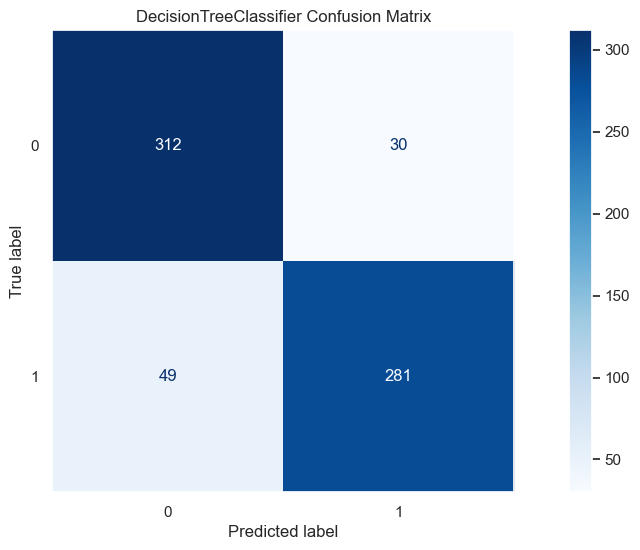

In [77]:
dtree_model.confusion_matrix()

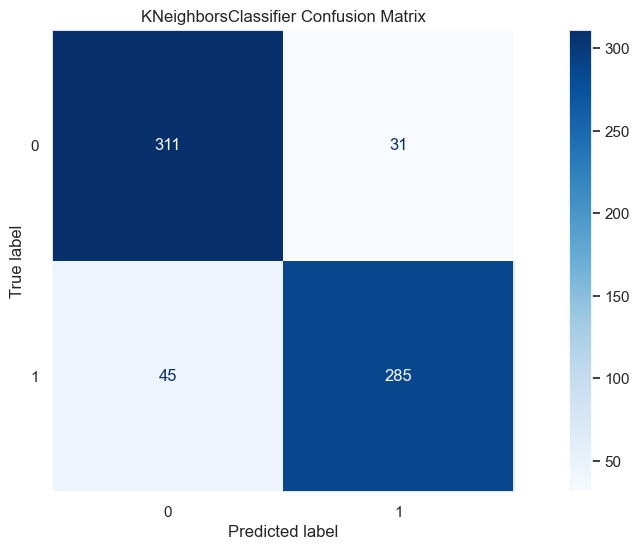

In [78]:
knear_model.confusion_matrix()

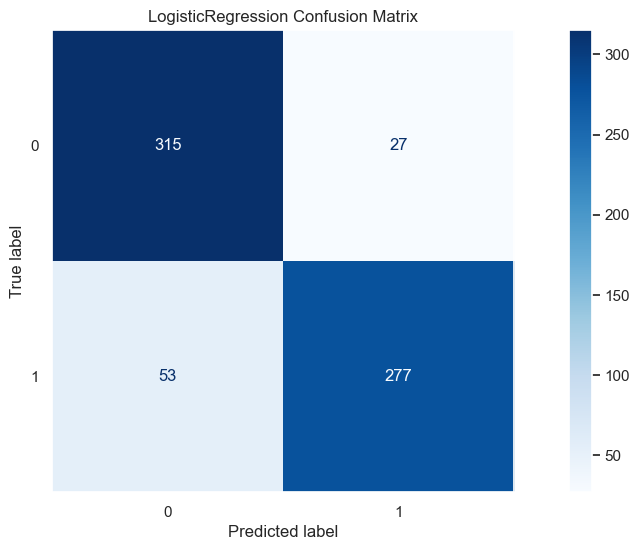

In [83]:
logreg_model.confusion_matrix()

### Perform randomized search for each model

In [84]:
dt_model = DecisionTreeClassifier(
    max_depth=4, min_samples_split=8, 
    min_samples_leaf=2, random_state=54,
    splitter='best', criterion='gini'
)
dt_model.fit(x_train, y_train)

y_pred_dt = dt_model.predict(x_test)

In [85]:
# K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
#  weights='uniform', algorithm='kd_tree')
knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)

In [86]:
# Logistic Regression Classifier
logreg_model = LogisticRegression(C=1, penalty='l2', solver='newton-cg')
# max_iter=2000, random_state=42)
logreg_model.fit(x_train, y_train)
y_pred_logreg = logreg_model.predict(x_test)

In [87]:
models = {'Decision Tree': (dt_model, y_pred_dt),
          'KNN': (knn_model, y_pred_knn),
          'Logistic Regression': (logreg_model, y_pred_logreg)}

In [88]:
def plot_model_evaluation(models, X_test, y_test):
    fig, axes = plt.subplots(nrows=2, ncols=len(models), figsize=(20, 10))
    plt.subplots_adjust(hspace=0.5)

    for i, (model_name, (model, y_pred)) in enumerate(models.items()):
        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        labels = ['Low', 'High']
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, i], xticklabels=labels, yticklabels=labels)
        axes[0, i].set_title(f'Confusion Matrix - {model_name}')

        # Classification Report
        classification_rep = classification_report(y_test, y_pred, output_dict=True)
        sns.heatmap(pd.DataFrame(classification_rep).iloc[:-1, :].T, annot=True, cmap='Blues', ax=axes[1, i])
        axes[1, i].set_title(f'Classification Report - {model_name}')

        # Accuracy
        accuracy = accuracy_score(y_test, y_pred)
        axes[1, i].text(0.5, -0.2, f'Accuracy: {accuracy:.2%}', horizontalalignment='center',
                        verticalalignment='center', transform=axes[1, i].transAxes)

    plt.show()

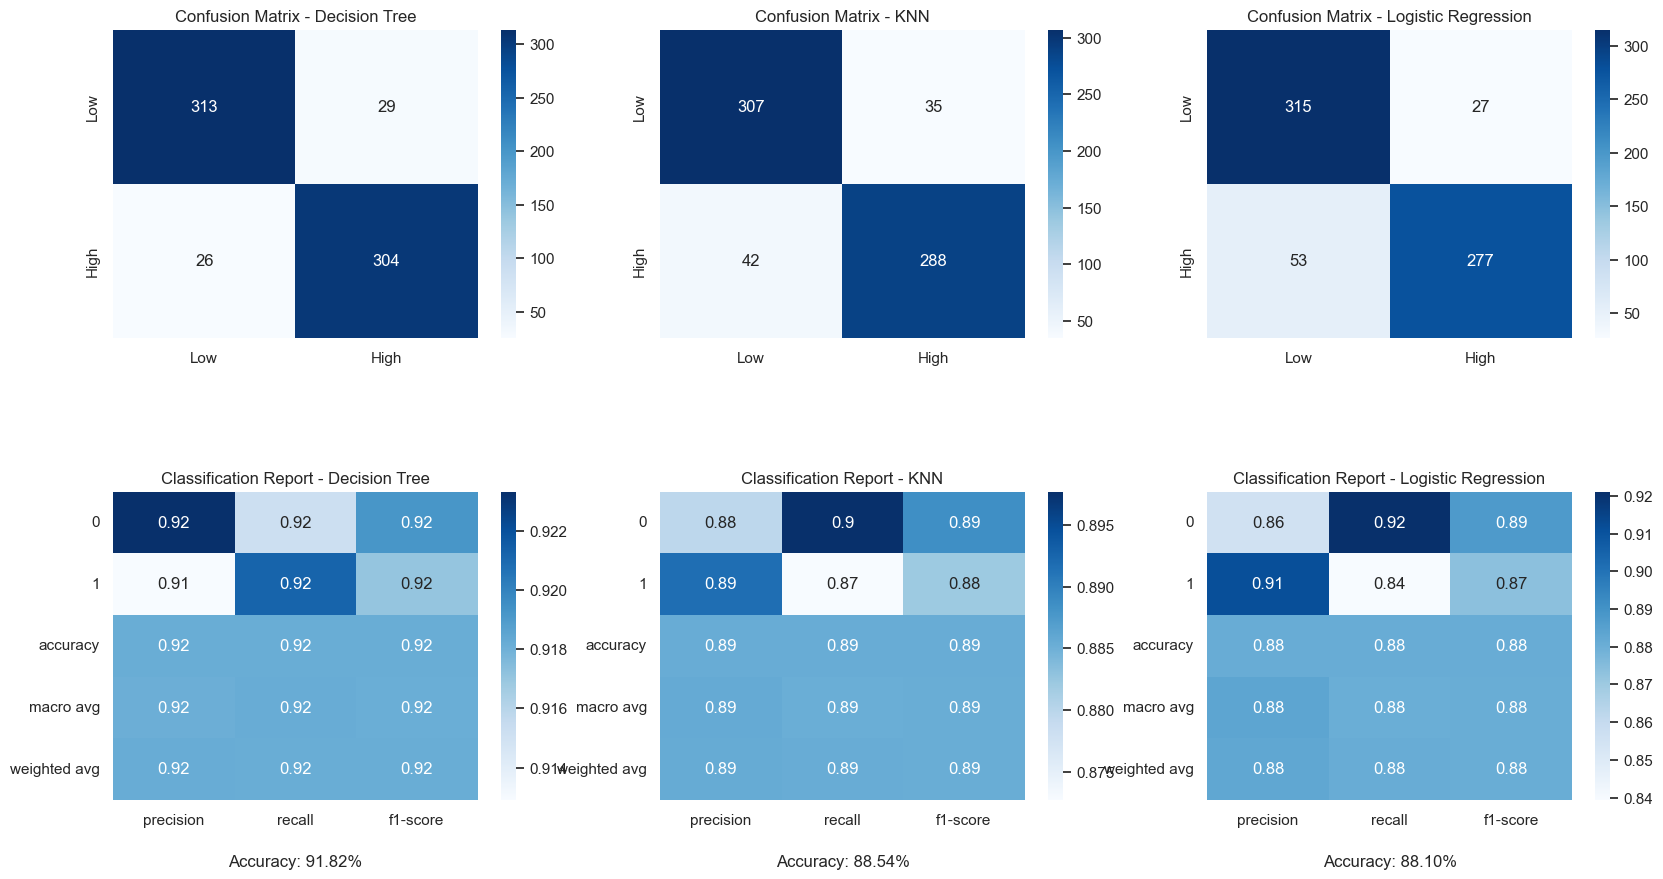

In [89]:
plot_model_evaluation(models, x_test, y_test)

In [90]:
def hyper_param_comp(param_range, init_params, param):
    test_accs = []
    train_accs = []
    for i in param_range:
        init_params[param] = i
        classifier = RandomForestClassifier(criterion=init_params['criterion'], max_depth=init_params['max_depth'], n_estimators=init_params['n_estimators'])
        RF = Classifier(classifier, grid_search_params, X_train, y_train)
        test_accs.append(RF.calc_accuracy(X_test, y_test))
        train_accs.append(RF.train_accuracy)
        
    plt.plot(param_range, test_accs, color='blue', label='test')
    plt.plot(param_range, train_accs, color='red', label='train')
    plt.xlabel(param)
    plt.ylabel('Accuracy')
    plt.legend(loc="lower right")

## 20 GridSearchCV

GridSearchCV is a technique used in machine learning to fine-tune hyperparameters effectively, aiming to find the best combination for a model. It involves specifying various hyperparameters and testing different combinations to determine the optimal set.

Key parameters include:

- estimator: 

This represents the model under consideration for parameter tuning.

- param_grid: 

It's a dictionary or list of dictionaries that outlines the hyperparameters and their potential values to explore.

- cv: 

Denotes the cross-validation strategy, determining how the dataset is split into training and validation sets.

- scoring: 

This metric evaluates and scores the model's performance against the validation set.

- n_jobs: 

Specifies the number of CPU cores used for parallel processing. Using n_jobs=-1 utilizes all available CPU cores for faster computation.

- verbose: 

Controls the level of detail in the output during the search process. Setting verbose=1 displays progress messages during the hyperparameter search.

In [148]:
dtree_grid_s_params = {
        "criterion": ["gini", "entropy"],
        "splitter": ["best", "random"],
        "max_depth": range(2, 9),
        "min_samples_split": range(2, 9),
        "min_samples_leaf": range(2, 9),
        "random_state": [54],
}
print(f'Decision Tree')
dtree_model.grid_search(dtree_grid_s_params)

knear_grid_s_params = {
        "n_neighbors": range(2,20),
        "metric": ["euclidean", "manhattan", "minkowski"]
}
print(f'K Nearest Neighbors')
grid_res = knear_model.grid_search(knear_grid_s_params)

# print(f'Logistic reg model')
# grid_s_params = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
#     "penalty": ["l2"],
#     "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
# }
# grid_res = logreg_model.grid_search()

Decision Tree
- model's test accuracy              : 0.882
- Test Score(accuracy)               : 0.914
- Best hyperparameters               : {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 54, 'splitter': 'best'}
- Best model's train score (accuracy): 0.919
- Best model's test score            : 0.914
K Nearest Neighbors
- model's test accuracy              : 0.887
- Test Score(accuracy)               : 0.890
- Best hyperparameters               : {'metric': 'euclidean', 'n_neighbors': 3}
- Best model's train score (accuracy): 0.913
- Best model's test score            : 0.890


In [149]:
dtree_params = {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 8, 'min_samples_split': 2, 'random_state': 1}
new_dtree_classifier = Classifier(DecisionTreeClassifier, x_train, y_train, x_test, y_test, dtree_params)
print(f'Decision Tree test:       {new_dtree_classifier.accuracy_test() * 100:.3f}%')
print(f'Decision Tree train:       {new_dtree_classifier.accuracy_train() * 100:.3f}%')

Decision Tree test:       91.220%
Decision Tree train:       92.921%


In [150]:
knear_params = {'n_neighbors': 9}
new_knear_classifier = Classifier(KNeighborsClassifier, x_train, y_train, x_test, y_test, knear_params)
print(f'knn test:       {new_knear_classifier.accuracy_test() * 100:.3f}%')
print(f'knn train:       {new_knear_classifier.accuracy_train() * 100:.3f}%')

knn test:       88.542%
knn train:       92.283%


## 21 Underfitting and Overfitting

There is two important concepts:


- **Bias**:
Bias refers to our accuracy in capturing the intricacies of the training data. Higher precision leads to lower bias. It implies considering every feature, even noisy data. Lower bias results in reduced error detection in the training data. However, it's not necessarily positive since it might lead to training on incorrect, noisy data, ultimately reducing the classifier's ability to generalize.

- **Variance**:
Variance gauges the classifier's performance on new, unseen data. Lower variance implies better performance on testing data. It signifies the classifier's ability to generalize and accurately identify patterns in the testing dataset.

As much as we want low bias and variance at once, that is not usually the case because once we lower one, the other one increases.  

---
**Overfitting** happens when a model becomes excessively intricate, fitting the training data too precisely. It starts capturing noise instead of the actual patterns in the data, leading to reduced performance when applied to new, unseen data. This problem arises due to several factors: an abundance of features, excessive complexity, or prolonged training. To spot overfitting, comparing the model's performance on training versus validation data is crucial. If the model excels on the training data but falters on the validation data, it's likely overfitting.

**Underfitting** occurs when a model is too basic to capture the underlying data patterns adequately. It results in poor performance not only on the training data but also on new, unseen data. Underfitting arises from having too few features, excessive simplicity, or insufficient training duration. Detecting underfitting involves assessing the model's performance on both the training and validation data. If the model struggles on both sets of data, it's likely underfitting.

To combat overfitting, strategies like regularization, early stopping, or simplifying the model can be employed. Regularization involves adding a penalty to the loss function to discourage overly large weights, while early stopping halts training when the model's performance on validation data plateaus.

To tackle underfitting, approaches such as adding more features, increasing model complexity, or extending training duration can be helpful. Yet, it's crucial to strike a balance between model complexity and available data. A more intricate model might demand more data to prevent overfitting from occurring.

In [151]:
print(f'Decision Tree:       {dtree_model.accuracy_train() * 100:.3f}%')
print(f'K Nearest Neighbors: {knear_model.accuracy_train() * 100:.3f}%')

Decision Tree:       100.000%
K Nearest Neighbors: 93.495%


Test previous Results:

`Decision Tree`:       $90.923%$

`K Nearest Neighbors`: $88.095%$

`Logistic Regression`: $87.649%$

as we can see, the result on train data is a little better thant the result in test data but in overal they are st the same reange.

## 22

After changing the threshold for removing columns with low correlations, the result changes, but the total change isn't very significant.

## 23

[Text(0.26328633288344405, 0.9772727272727273, 'MntMeatProducts <= -0.458\ngini = 0.5\nsamples = 1568\nvalue = [800, 768]\nclass = Low'),
 Text(0.12624584717607973, 0.9318181818181818, 'MntCoffee <= 0.057\ngini = 0.176\nsamples = 769\nvalue = [694, 75]\nclass = Low'),
 Text(0.11738648947951273, 0.8863636363636364, 'MntGoldProds <= 0.111\ngini = 0.079\nsamples = 724\nvalue = [694, 30]\nclass = Low'),
 Text(0.0664451827242525, 0.8409090909090909, 'MntSweetProducts <= 0.943\ngini = 0.04\nsamples = 685\nvalue = [671, 14]\nclass = Low'),
 Text(0.05758582502768549, 0.7954545454545454, 'MntCoffee <= -0.334\ngini = 0.035\nsamples = 683\nvalue = [671, 12]\nclass = Low'),
 Text(0.026578073089700997, 0.75, 'MntCoffee <= -0.414\ngini = 0.015\nsamples = 654\nvalue = [649, 5]\nclass = Low'),
 Text(0.017718715393133997, 0.7045454545454546, 'gini = 0.0\nsamples = 580\nvalue = [580, 0]\nclass = Low'),
 Text(0.035437430786267994, 0.7045454545454546, 'Income <= 0.444\ngini = 0.126\nsamples = 74\nvalue = 

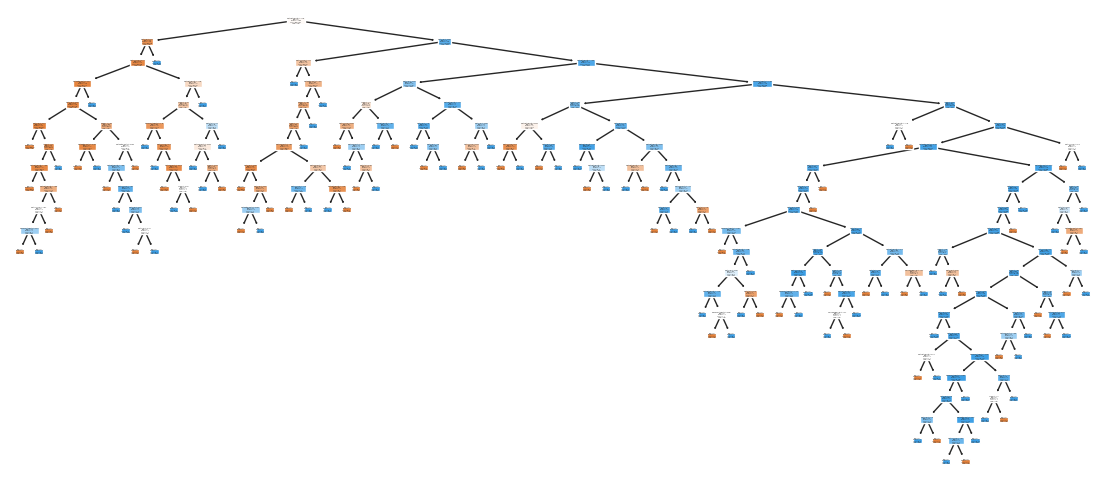

In [152]:
plot_tree(dtree_model.model_instance, filled=True, feature_names=x_train.columns, class_names=['Low', 'High'])

# Ensemble Learning Methods

In [153]:
class RandForestClassifier:
    def __init__(self, x_train, y_train, x_test, y_test, n_estimators: int = 100, max_depth: int = 8):

        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test

        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.set_params()

    def set_params(self):
        self.randf = RandomForestClassifier(criterion='entropy',
                                            max_depth=self.max_depth,
                                            n_estimators=self.n_estimators,
                                            random_state=1)
        self.randf.fit(self.x_train, self.y_train)
        self.randf_predict = self.randf.predict(self.x_test)

    def accuracy_test(self) -> float:
        return metrics.accuracy_score(self.y_test, self.randf_predict)

    def accuracy_train(self) -> float:
        train_predict = self.randf.predict(self.x_train)
        return metrics.accuracy_score(self.y_train, train_predict)

    def confusion_matrix(self):
        matrix_randf = metrics.confusion_matrix(self.y_test, self.randf_predict)
        matrix_disp = metrics.ConfusionMatrixDisplay(matrix_randf)
        matrix_disp.plot(cmap='Blues')
        plt.grid(False)
        plt.title('Random Forest Confusion Matrix')
        plt.show()

    def grid_search(self) -> tuple[float, GridSearchCV]:
        search_params = {
            'n_estimators': range(70, 230, 30),
            'criterion': ['entropy'],
            'max_depth': range(4, 10),
            'random_state': [1]
        }
        grid = GridSearchCV(self.randf, search_params, scoring='accuracy', n_jobs=2)
        grid.fit(self.x_train, self.y_train)
        test_score = grid.score(self.x_test, self.y_test)
        return test_score, grid

Random Forest: 96.556%
Random Forest: 92.560%


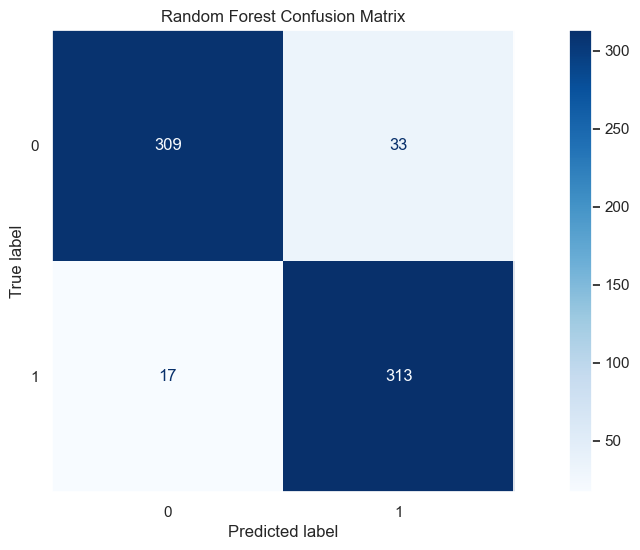

Random Forest
Test Score: 0.9241071428571429
Params: {'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 100, 'random_state': 1}


In [154]:
randf_model = RandForestClassifier(x_train, y_train, x_test, y_test)

print(f'Random Forest: {randf_model.accuracy_train() * 100:.3f}%')
print(f'Random Forest: {randf_model.accuracy_test() * 100:.3f}%')
randf_model.confusion_matrix()

grid_res = randf_model.grid_search()
print(f'Random Forest\nTest Score: {grid_res[0]}\nParams: {grid_res[1].best_params_}')

## 24 Hyperparameters

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


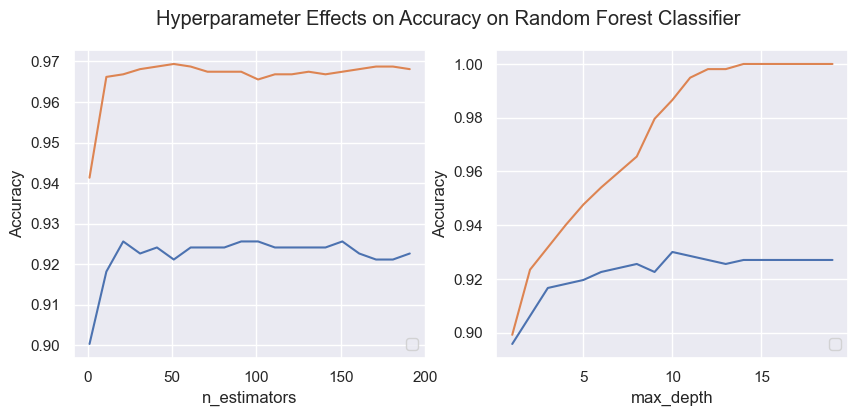

In [155]:
def n_estimators_effects():
    n_estimators = range(1, 200, 10)
    train_res = []
    test_res = []
    for est_count in n_estimators:
        randf = RandForestClassifier(x_train, y_train, x_test, y_test, n_estimators=est_count)
        test_res.append(randf.accuracy_test())
        train_res.append(randf.accuracy_train())

    plt.plot(n_estimators, test_res)
    plt.plot(n_estimators, train_res)
    plt.xlabel('n_estimators')
    plt.ylabel('Accuracy')
    plt.legend(loc="lower right")


def max_depth_effects():
    max_depths = range(1, 20)
    train_res = []
    test_res = []
    for depth in max_depths:
        randf = RandForestClassifier(x_train, y_train, x_test, y_test, max_depth=depth)
        test_res.append(randf.accuracy_test())
        train_res.append(randf.accuracy_train())

    plt.plot(max_depths, test_res)
    plt.plot(max_depths, train_res)
    plt.xlabel('max_depth')
    plt.ylabel('Accuracy')
    plt.legend(loc="lower right")


plt.figure(figsize=(10, 4))
plt.suptitle('Hyperparameter Effects on Accuracy on Random Forest Classifier')
plt.subplot(1, 2, 1)
n_estimators_effects()
plt.subplot(1, 2, 2)
max_depth_effects()

## 25 Comparative Analysis of Bias and Variance: Decision Tree vs. Random Forest

In [156]:
dtree = DecisionTreeClassifier(** dtree_params)
_, dtree_bias, dtree_var = bias_variance_decomp(
                                dtree,
                                x_train.values, y_train.values,
                                x_test.values, y_test.values,
                                loss='mse', random_seed=10
                           )


In [157]:
_, randf_bias, randf_var = bias_variance_decomp(randf_model.randf,
                                                x_train.values, y_train.values,
                                                x_test.values, y_test.values,
                                                loss='mse', random_seed=1)

In [158]:
display(HTML(f'<b>Decision Tree Bias:</b>     {dtree_bias:.3f}'))
display(HTML(f'<b>Decision Tree Variance:</b> {dtree_var:.3f}'))
display(HTML(f'<b>Random Forest Bias:</b>     {randf_bias:.3f}'))
display(HTML(f'<b>Random Forest Variance:</b> {randf_var:.3f}'))

According to the formula, Bias is the difference between the average prediction of our model and the correct value which we are trying to predict.
A high bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting).

Variance is the variability of model prediction for a given data point or a value which indicates the spread of the data. 

High variance can result in overfitting, which means the model is capturing the random noise in the training data instead of the desired outputs.

Random forests are an ensemble method that combines multiple decision trees to reduce variance and improve generalization but Decision Trees have more varaince and less bias because they tend to overfit with training data.


[Text(0.41304347826086957, 0.9, 'x[4] <= -0.458\nentropy = 0.999\nsamples = 1568\nvalue = [812, 756]'),
 Text(0.17391304347826086, 0.7, 'x[2] <= -0.414\nentropy = 0.474\nsamples = 798\nvalue = [717, 81]'),
 Text(0.08695652173913043, 0.5, 'x[7] <= 0.421\nentropy = 0.032\nsamples = 608\nvalue = [606, 2]'),
 Text(0.043478260869565216, 0.3, 'entropy = 0.0\nsamples = 600\nvalue = [600, 0]'),
 Text(0.13043478260869565, 0.3, 'entropy = 0.811\nsamples = 8\nvalue = [6, 2]'),
 Text(0.2608695652173913, 0.5, 'x[2] <= 0.06\nentropy = 0.979\nsamples = 190\nvalue = [111, 79]'),
 Text(0.21739130434782608, 0.3, 'x[4] <= -0.625\nentropy = 0.803\nsamples = 147\nvalue = [111, 36]'),
 Text(0.17391304347826086, 0.1, 'entropy = 0.116\nsamples = 64\nvalue = [63, 1]'),
 Text(0.2608695652173913, 0.1, 'entropy = 0.982\nsamples = 83\nvalue = [48, 35]'),
 Text(0.30434782608695654, 0.3, 'entropy = 0.0\nsamples = 43\nvalue = [0, 43]'),
 Text(0.6521739130434783, 0.7, 'x[2] <= -0.362\nentropy = 0.539\nsamples = 770\nv

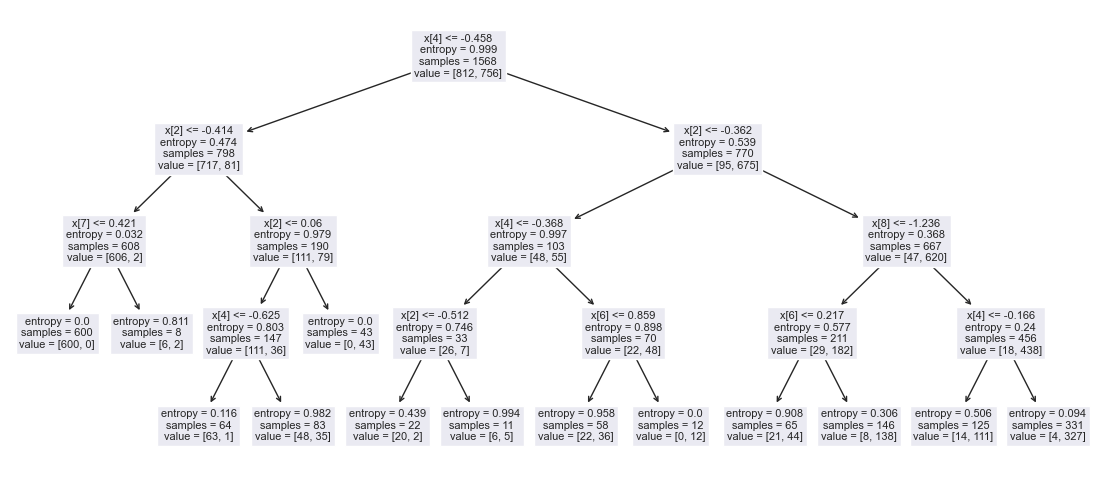

In [159]:
plot_tree(dtree) #This is best dtree with best_params

# Differential privacy

## 26

Adding noise to a dataset is a technique used for **data anonymization**, **enhancing privacy and security**. It makes it difficult to identify individuals in the dataset and mitigates risks of re-identification and inference attacks. However, it may reduce data quality and utility. The impact of noise addition varies based on the specific tasks and applications for which the data is used. If noise addition follows a differential privacy framework, it provides a formal guarantee of privacy protection. Balancing privacy preservation and data utility is crucial. Adherence to privacy-preserving frameworks like differential privacy can provide formal guarantees of individual privacy protection.

## 27

**Pulsed Noise** and **Gaussian Noise** are two common methods for adding noise to data. 

* Pulsed Noise introduces abrupt changes resembling pulses, often used to simulate sudden disturbances.
* Gaussian Noise adds smooth, continuous variation following a normal distribution, commonly used in statistical modeling and simulations for a more natural variation.

## 28

In [164]:
def noise_gen(data, sensitivity, eps=1.0):
    return np.random.laplace(0, scale=sensitivity / eps, size=data.shape)

In [165]:
def add_noise():
    nx_train=[]
    nx_test=[]
    sensitivity_range = [0.1, 0.5, 1.0, 2.0, 2.5, 3]
    for sensitivity in sensitivity_range:
        nx_train.append(x_train + noise_gen(x_train, sensitivity))
        nx_test.append(x_test + noise_gen(x_test, sensitivity))
    return nx_train, nx_test

In [182]:
def calculate_accuracy(class_type, sensitivity_range, DT_grid_search_params, noisy_X_trains, y_train, noisy_X_tests, y_test):
    scores = [0] * len(sensitivity_range)
    for i in range(len(sensitivity_range)):
        DT = Classifier(class_type, noisy_X_trains[i], y_train, noisy_X_tests[i], y_test)
        scores[i] = DT.accuracy_test()
    return scores

def plot_accuracy_vs_sensitivity(sensitivity_range, scores):
    plt.plot(sensitivity_range, scores)
    plt.xlabel('sensitivity')
    plt.ylabel('Accuracy')
    plt.title('Decision Tree Accuracy with noise')
    plt.show()

In [183]:
nx_train, nx_test = add_noise()

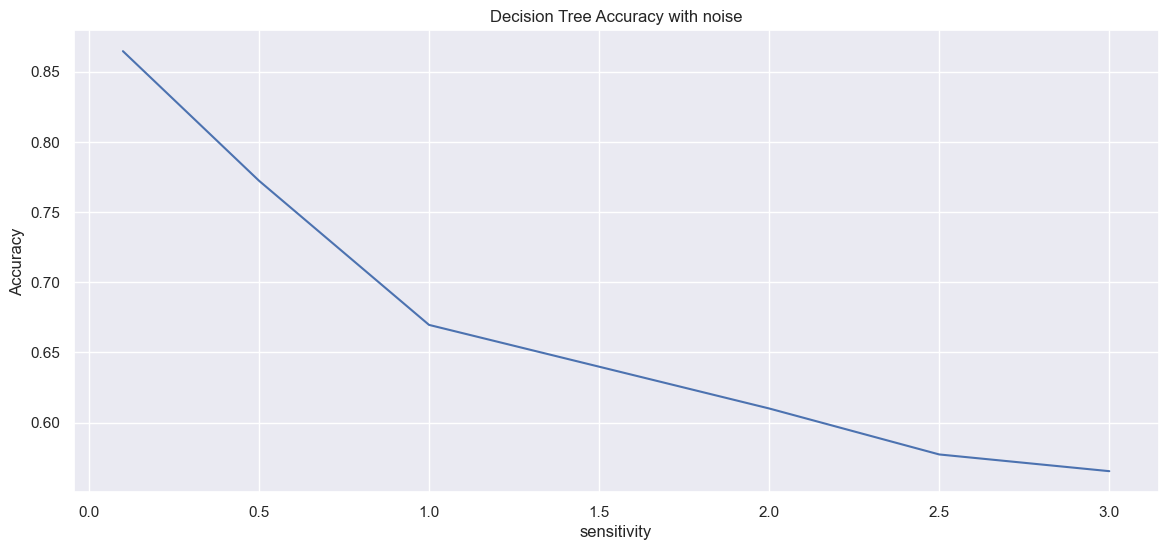

In [184]:
sensitivities = [x / 10.0 for x in range(1, 30, 1)]

scores = calculate_accuracy(DecisionTreeClassifier, sensitivity_range, dtree_params, nx_train, y_train, nx_test, y_test)
plot_accuracy_vs_sensitivity(sensitivity_range, scores)

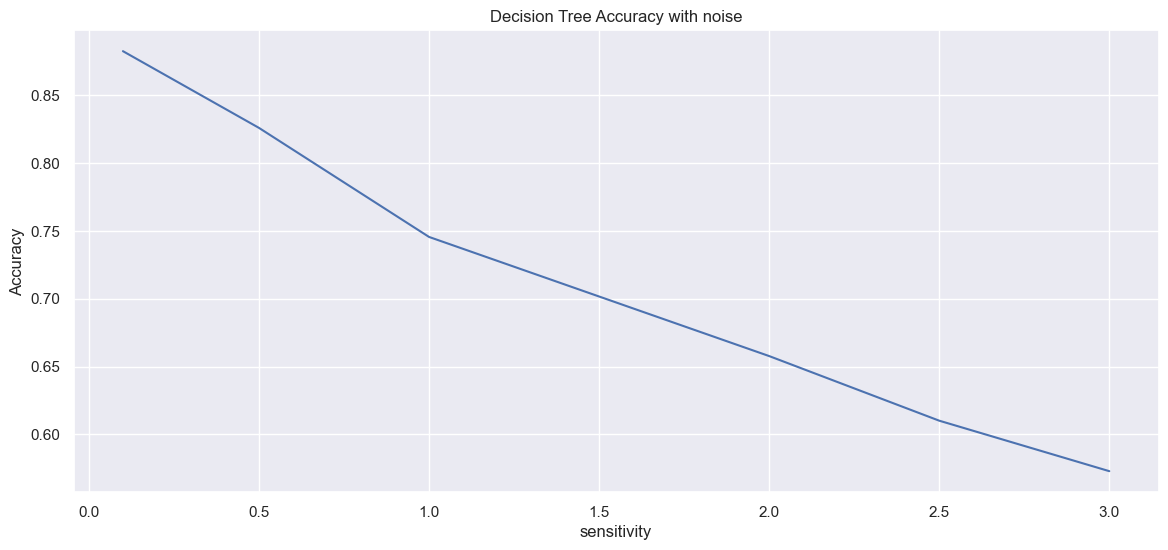

In [188]:
sensitivities = [x / 10.0 for x in range(1, 30, 1)]

scores = calculate_accuracy(KNeighborsClassifier, sensitivity_range, knear_params, nx_train, y_train, nx_test, y_test)
plot_accuracy_vs_sensitivity(sensitivity_range, scores)

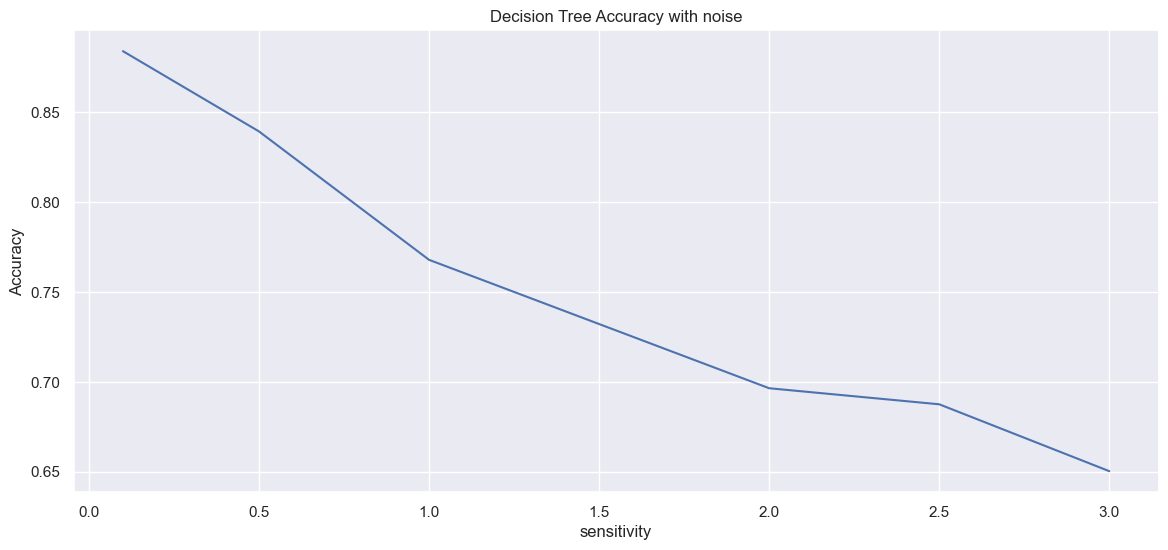

In [189]:
sensitivities = [x / 10.0 for x in range(1, 30, 1)]

scores = calculate_accuracy(LogisticRegression, sensitivity_range, knear_params, nx_train, y_train, nx_test, y_test)
plot_accuracy_vs_sensitivity(sensitivity_range, scores)

In [108]:
noisy_dtree_model = Classifier(DecisionTreeClassifier, nx_train[3], y_train, nx_test[3], y_test)
noisy_knear_model = Classifier(KNeighborsClassifier, nx_train[3], y_train, nx_test[3], y_test)
noisy_logreg_model = Classifier(LogisticRegression, nx_train[3], y_train, nx_test[3], y_test)

In [109]:
# Print accuracy on the noisy dataset
print(f'Noisy Decision Tree:       {noisy_dtree_model.accuracy_test() * 100:.3f}%')
print(f'Noisy K Nearest Neighbors: {noisy_knear_model.accuracy_test() * 100:.3f}%')
print(f'Noisy Logistic Regression: {noisy_logreg_model.accuracy_test() * 100:.3f}%')

Noisy Decision Tree:       58.482%
Noisy K Nearest Neighbors: 66.220%
Noisy Logistic Regression: 69.494%


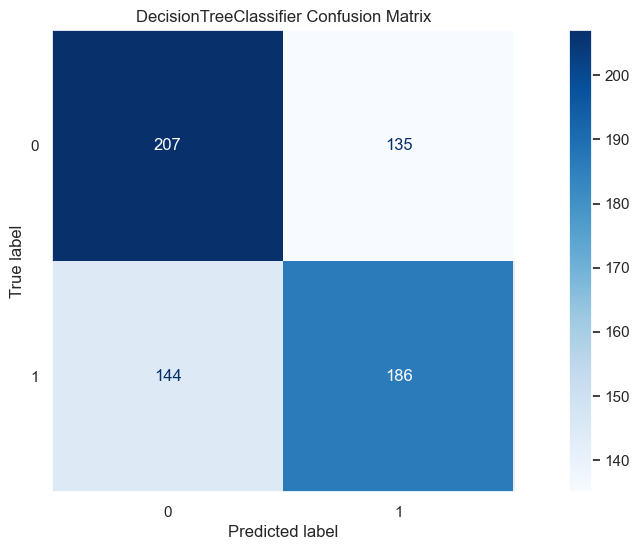

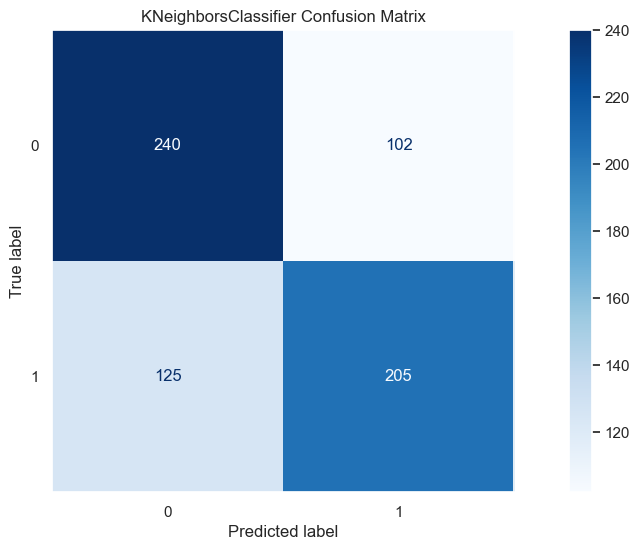

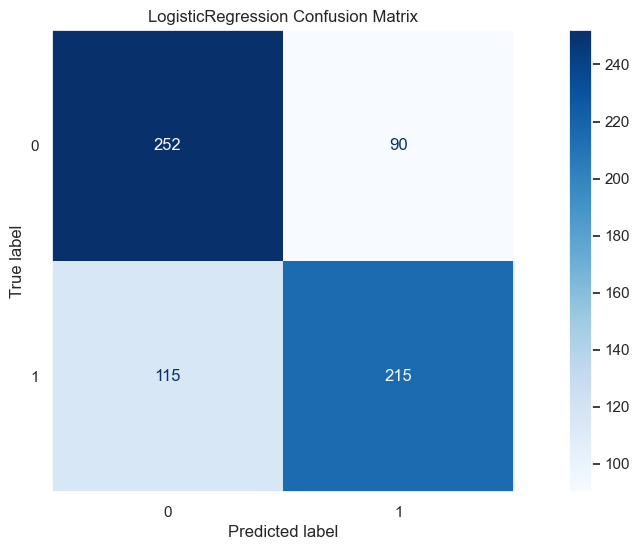

In [110]:
# Compare confusion matrices
noisy_dtree_model.confusion_matrix()
noisy_knear_model.confusion_matrix()
noisy_logreg_model.confusion_matrix()

# Gradient-boosting

## 29. Explain about this method and it's difference with decision tree

**Gradient Boosting:**
It builds an ensemble of decision trees to make predictions. It works by iteratively adding decision trees to the ensemble, with each new tree attempting to correct the errors made by the previous trees.

The algorithm starts by building a single decision tree on the training data. It then uses this tree to make predictions on the training data, and calculates the errors between the predicted values and the actual values. These errors are then used to train a second decision tree, which attempts to correct the errors made by the first tree. This process is repeated for a specified number of iterations, with each new tree attempting to correct the errors made by the previous trees.

During each iteration, the algorithm calculates the gradient of the loss function with respect to the predictions made by the current ensemble. This gradient is then used to fit a new decision tree to the negative gradient of the loss function, which is the residual error that the current ensemble is unable to explain. The new tree is then added to the ensemble, and the process is repeated until the specified number of iterations is reached.

The final prediction of the ensemble is the sum of the predictions made by all the individual trees in the ensemble. The algorithm uses a learning rate parameter to control the contribution of each new tree to the final prediction. A smaller learning rate will result in a more conservative model, while a larger learning rate will result in a more aggressive model.

---

**Differnces:**

The main difference between Gradient Boosting and Decision Trees is that Gradient Boosting is an ensemble method that combines multiple decision trees to make predictions, while Decision Trees are standalone models that make predictions based on a single tree.

Decision Trees are a simple and interpretable model that can be used for both regression and classification tasks. They work by recursively splitting the data into subsets based on the values of the input variables, until a stopping criterion is met. The resulting tree structure can be visualized and interpreted, making it easy to understand how the model is making predictions.

Gradient Boosting, on the other hand, is a more complex and powerful algorithm that can be used for both regression and classification tasks. It works by iteratively adding decision trees to the ensemble, with each new tree attempting to correct the errors made by the previous trees. The resulting ensemble of trees can be more accurate than a single decision tree, but it is also more complex and harder to interpret.

Another difference between Gradient Boosting and Decision Trees is that Gradient Boosting can handle non-linear relationships between the input variables and the output variable, while Decision Trees are limited to linear relationships. Gradient Boosting can also handle missing data and outliers more effectively than Decision Trees, as it is less prone to overfitting.

In summary, Decision Trees are simple and interpretable models that can be used for both regression and classification tasks, while Gradient Boosting is a more complex and powerful algorithm that combines multiple decision trees to make predictions. Gradient Boosting can handle non-linear relationships, missing data, and outliers more effectively than Decision Trees, but it is also more complex and harder to interpret.
---------------------------------------------------------------
Gradient boosting is an ensemble learning technique used for both regression and classification problems.
It builds a series of weak learners, typically decision trees, sequentially.
Each new tree corrects the errors of the combined ensemble of the existing trees.
The predictions of each tree are weighted based on their performance, with more accurate trees receiving higher weights.

> Working Process:
Initial Model: Start with a simple model, often a shallow decision tree.
Residuals Calculation: Calculate the residuals (differences between predictions and actual values) for the current model.
Next Model: Build a new weak learner (tree) that focuses on minimizing the residuals of the previous model.
Weighted Combination: Combine the new model with the previous ones, giving more weight to accurate models and less weight to less accurate ones.
Iteration: Repeat steps 2-4 until a predefined number of models are created or until a specified level of performance is achieved.

Difference Between Boosting Trees and Decision Trees:

Boosting Trees:

Ensemble of Weak Models: Boosting trees involve creating an ensemble of weak models, usually shallow decision trees.
Sequential Learning: Trees are built sequentially, with each tree aiming to correct the errors of the combined ensemble.
Weighted Contributions: Each tree's contribution to the final prediction is weighted based on its accuracy.

Decision Trees:

Individual Strong Model: A single decision tree is a standalone model.
Non-Sequential Learning: Decision trees are constructed independently without considering errors from previous models.
Equal Contributions: Each tree has an equal contribution to the final prediction, and there is no weighting based on accuracy.

Summary:

Boosting trees are an ensemble method that combines weak models sequentially to improve accuracy.
Decision trees, when used individually, are standalone models without the sequential learning and weighted contributions characteristic of boosting trees.

In summary, boosting-gradient is a powerful technique that iteratively builds weak learners, often decision trees, with each new model aiming to correct the errors of the combined ensemble. This sequential learning and weighted combination process allows boosting to achieve high predictive accuracy.


## 30. What is XGBoost and how does it work?

XGBoost (Extreme Gradient Boosting) is a popular implementation of the Gradient Boosting algorithm that is designed to be highly scalable and efficient.  The XGBoost algorithm uses a technique called gradient boosting to minimize a loss function, which is a measure of how well the model is able to predict the target variable. One of the key features of XGBoost is its ability to handle missing data and outliers. It does this by using a technique called regularization, which penalizes complex models and encourages simpler models that are less likely to overfit the data. XGBoost also uses a technique called pruning to remove branches of the decision tree that do not contribute to the overall accuracy of the model.

Another important feature of XGBoost is its ability to handle both sparse and dense data. It does this by using a technique called sparsity-aware split finding, which is able to handle missing values and zero values in sparse data more efficiently than traditional split finding algorithms.

XGBoost also includes a number of other features that make it a powerful and flexible algorithm for machine learning tasks. These include support for custom loss functions, early stopping to prevent overfitting, and the ability to handle multi-class classification problems.

Overall, XGBoost is a highly effective algorithm for a wide range of machine learning tasks, including regression, classification, and ranking. Its ability to handle missing data, outliers, and sparse data, as well as its support for custom loss functions and early stopping, make it a popular choice for many data scientists and machine learning practitioners.

## 31. Implement XGBoost algorithm tune it's hyperparameters

Here are some of the most important hyperparameters for the XGBoost algorithm:

1. `max_depth`: The maximum depth of each decision tree in the ensemble. Increasing this value can make the model more complex and potentially more accurate, but may also increase the risk of overfitting.

2. `learning_rate`: The step size used to update the weights of the model during each iteration. A smaller learning rate can make the model more conservative and less prone to overfitting, but may also require more iterations to converge.

3. `n_estimators`: The number of decision trees in the ensemble. Increasing this value can make the model more accurate, but may also increase the risk of overfitting and make the model slower to train.

4. `subsample`: The fraction of the training data used to train each decision tree. Setting this value to less than 1.0 can make the model more robust to noise and reduce overfitting.

5. `colsample_bytree`: The fraction of the features used to train each decision tree. Setting this value to less than 1.0 can make the model more robust to noise and reduce overfitting.

6. `gamma`: The minimum reduction in the loss function required to make a split at a node. Increasing this value can make the model more conservative and less prone to overfitting.

7. `reg_alpha`: L1 regularization term on weights. Increasing this value can make the model more conservative and less prone to overfitting.

8. `reg_lambda`: L2 regularization term on weights. Increasing this value can make the model more conservative and less prone to overfitting.

In [194]:
xgb = XGBClassifier()

params = {
    'max_depth': range(3,11,2),
    'learning_rate': [0.01, 0.03, 0.09, 0.1],
    'n_estimators': range(20,201,30),
    'gamma': [0, 1, 10, 100]
    # 'max_depth': [3, 5, 7],
    # 'learning_rate': [0.1, 0.01],
    # 'n_estimators': [50, 100, 200],
    # # 'subsample': [0.5, 0.7, 1],
    # # 'colsample_bytree': [0.7, 1.0],
    # 'gamma': [0, 1, 5]
}

xgb_grid_search = GridSearchCV(estimator=xgb, param_grid=params, cv=5, scoring="accuracy")
xgb_grid_search.fit(x_train, y_train)
print(f"Best Accuracy: {xgb_grid_search.best_score_ * 100:2.2f}%")
print(f"Best Parameters: {xgb_grid_search.best_params_}")
print(f"Gradient-boosting Accuracy: {xgb_grid_search.score(x_test, y_test) * 100:2.2f}%")

Best Accuracy: 93.18%
Best Parameters: {'gamma': 1, 'learning_rate': 0.03, 'max_depth': 5, 'n_estimators': 200}
Gradient-boosting Accuracy: 92.56%


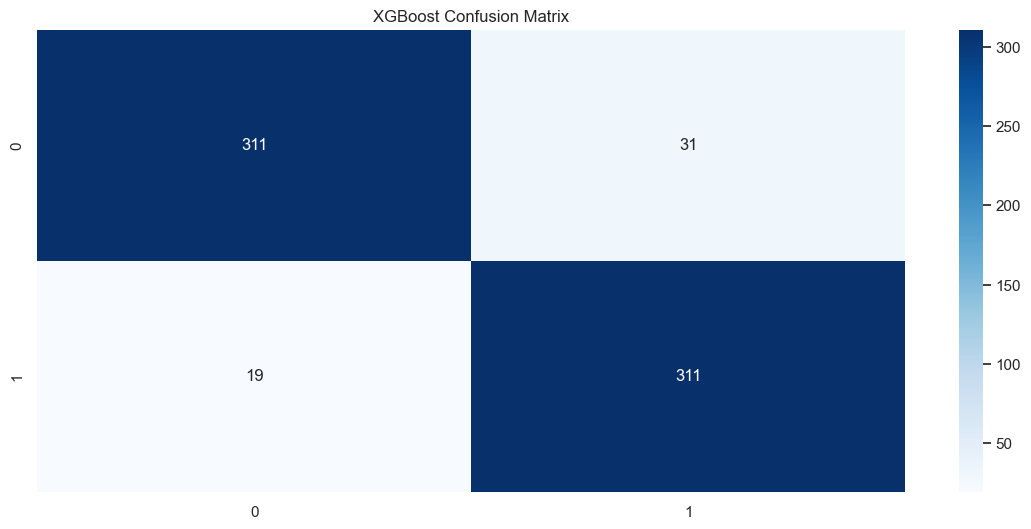

In [195]:
y_pred = xgb_grid_search.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['0', '1'], columns=['0', '1'])
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('XGBoost Confusion Matrix')
plt.show()